# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링

## **Mission 1. 탐색적 데이터 분석**

### **[미션 이해하기]**
* 여러분들은 K 보험사의 직원입니다. K 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[1일차] mission 1 목표 <b>: 고객의 기본 정보, 행동 정보 등을 확인해서 주요 변수를 선정하고 데이터 탐색해보기

---------------------------------------------------------------------------------------------
# **0. 환경설정(경로설정)**
*  [필요시] 구글 colab 설정 방법
    - 경로 설정 : 구글 colab
        * 구글 드라이브 바로 밑에 dxproject 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.

In [ ]:
# 구글 드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Path
# path = '/content/drive/MyDrive/dxproject/'

---------------------------------------------------------------------------------------------
#### <b>[실습프로세스]<b>

1. 데이터 불러오기
2. 데이터 기초 정보 확인
3. 주요 변수 선정 및 탐색
    * 분석가 선정 칼럼 탐색
    * 도메인 주요 항목 칼럼 탐색

---------------------------------------------------------------------------------------------
# **1. 데이터 불러오기**

* numpy, pandas, matplotlib, seaborn 등 데이터 분석에 필요한 라이브러리를 로딩해 봅시다.
* 만약 라이브러리가 없을 때 !pip를 통해 라이브러리를 설치해 주세요. (ex. !pip install pandas)
* 현위치에서 'customers_seg.csv' 파일을 읽어와 주세요.

In [1]:
# [같이 하기] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 등 임포트 하기

import numpy as np
import pandas as pd
import seaborn as sns
import os

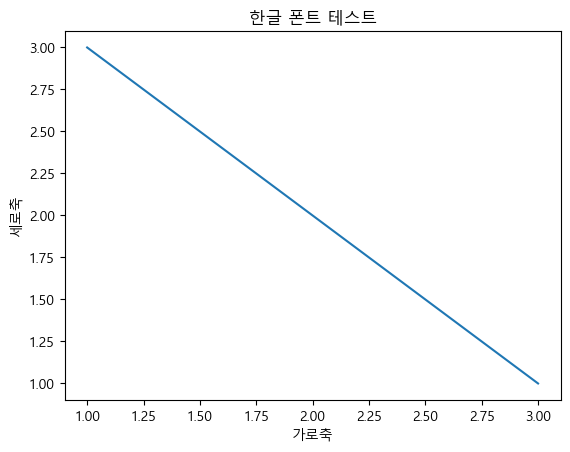

In [2]:
# 한글 세팅

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Windows용 폰트 설정 (예: Malgun Gothic)
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 확인용 그래프
plt.plot([1, 2, 3], [3, 2, 1])
plt.title("한글 폰트 테스트")
plt.xlabel("가로축")
plt.ylabel("세로축")
plt.show()


In [3]:
# [같이 하기] 데이터 불러오기
# 1. data 변수에 'customers_seg.csv' 파일을 불러오기
# 2. data 변수 호출해서 상위 5개 확인해보기

data = pd.read_csv('customers_seg.csv')

# [참고] colab으로 진행할 때
# data = pd.read_csv(path+'customers_seg.csv')
data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


---------------------------------------------------------------------------------------------
# **2. 데이터 기초 정보 확인하기**
* 불러온 데이터셋(data)의 기초 정보들을 확인해봅시다.

In [4]:
# [문제1] 데이터 셋의 상위 5개 행을 확인해보자.

data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [5]:
# [문제2] 데이터 셋의 하위 5개 행을 확인해보자.

data.tail()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
11995,11996,1,계약자,고용,1,25.9851,0,기본,대학졸업,86451000,...,기혼,70,0,2,비방문,설계사독려,인터넷,245000,일반세단,중
11996,11997,3,피보험자,고용,0,3.4410,1,중급,대학졸업,25962000,...,미혼,80,0,1,자주방문,할인,자사영업,468000,일반세단,중
11997,11998,3,피보험자,무직,1,9.0576,0,중급,대학졸업,0,...,미혼,90,3,2,자주방문,할인,자사영업,977000,일반세단,중
11998,11999,4,계약자,고용,1,8.3472,0,중급,대학졸업,26366000,...,기혼,100,0,3,비방문,포인트,자사영업,854000,일반세단,대
11999,12000,3,피보험자,무직,1,2.8971,0,중급,대학졸업,0,...,미혼,80,0,1,자주방문,없음,콜센터,456000,컴팩트카,중


In [6]:
# [문제3] data 데이터프레임의 행, 열의 개수 확인해보자.(shape)

data.shape

(12000, 21)

In [7]:
#[문제4] data 데이터프레임의 컬럼명, 데이터 개수, 데이터 타입 정보를 확인 해보자.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CID                      12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

In [8]:
# [문제5] 데이터 셋 수치형 데이터 기초통계 정보를 확인해보자

data.describe()

,CID,AGE,성별,Willingness to pay/Stay,갱신,소득,월 납입액,VOC,총지불금액
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,1.200000e+04
mean,6000.50000,3.079000,0.487583,8.859478,0.143000,4.641737e+07,100.065833,0.390167,5.355854e+05
std,3464.24595,1.121768,0.499867,7.698885,0.350087,3.736221e+07,42.453750,0.919605,3.587993e+05
min,1.00000,1.000000,0.000000,2.045730,0.000000,0.000000e+00,60.000000,0.000000,0.000000e+00
25%,3000.75000,3.000000,0.000000,4.373400,0.000000,0.000000e+00,70.000000,0.000000,3.360000e+05
50%,6000.50000,3.000000,0.000000,6.384831,0.000000,4.186240e+07,90.000000,0.000000,4.740000e+05
75%,9000.25000,4.000000,1.000000,9.867900,0.000000,7.664150e+07,120.000000,0.000000,6.790000e+05
max,12000.00000,6.000000,1.000000,92.496300,1.000000,1.320209e+08,350.000000,5.000000,3.573000e+06


In [9]:
# [문제6] 데이터 셋의 모든 컬럼명(변수명)을 확인해보자.

data.columns

Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

---------------------------------------------------------------------------------------------
# **3. 주요 변수 선정 및 탐색**

<b> 21개의 features 값은 어떤 의미일지 알아보고 주요 변수를 선정해 봅시다!

---------------------------------------------------------------------------------------------
<b>이 중 주요 변수를 선정 해 보았을 때 <font color="1E90FF"><b>11개의 features를 선정하였다.</font>
<font color="1E90FF"><b>* 우리의 목표: 군집화가 된 고객 segment 개발</font>
   
<span><b>1. 도메인 내 주요 정보 항목</span>
    <br><br>
        - (1) Willingness to pay/Stay: 계속 보험을 유지할 지 판단하는 지표 (신용점수, 납부/연체기록, 소득 등 활용)
    <br>- (2) 소득
    <br>- (3) 월 납입액
    <br>- (4) 타상품 보유 현황: 고객이 이용하는 K보험사의 타 서비스 수(어느정도 고객의 충성도를 알 수 있음)
    <br>- (5) 총지불금액
    
<span><b>2. 분석가 선정 컬럼</span>
    <br><br>- (6)AGE, (7)고용상태, (8)교육수준: 고객 기본 정보
    <br>- (9)상품타입, (10)거주지사이즈, (11)자동차: 소득 등과 연관해서 추정이 가능한 정보

## <b> (1) 분석가 선정 컬럼 탐색하기
* 분석가 선정 컬럼 : AGE, 고용상태, 교육수준, 상품 타입, 거주지사이즈, 자동차(총 6개 피쳐)
* 위 분석가 선정 컬럼을 탐색해 보자!

In [11]:
#[문제 7] 분석가 선정 컬럼들이 수치형인지 문자/범주형인지 알아보자! (info 활용)

data_analysis = data[ ['AGE', '고용상태', '교육수준', '상품타입', '거주지사이즈'] ]
data_analysis

,AGE,고용상태,교육수준,상품타입,거주지사이즈
0,3,무직,대학졸업,기본,소
1,1,고용,고졸이하,기본,중
2,2,휴직,대학졸업,기본,중
3,5,고용,고졸이하,고급,대
4,4,고용,석사,기본,중
...,...,...,...,...,...
11995,1,고용,대학졸업,기본,중
11996,3,고용,대학졸업,중급,중
11997,3,무직,대학졸업,중급,중
11998,4,고용,대학졸업,중급,대


In [12]:
data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AGE     12000 non-null  int64 
 1   고용상태    12000 non-null  object
 2   교육수준    12000 non-null  object
 3   상품타입    12000 non-null  object
 4   거주지사이즈  12000 non-null  object
dtypes: int64(1), object(4)
memory usage: 468.9+ KB


**【각각의 변수들이 어떤 의미를 가지고 있을지 데이터 탐색을 해보자!】**

### 1) AGE

In [13]:
#[같이 하기] AGE 변수는 범주형이다. 이에 대해 범주별 비율을 탐색해보자.(.value_counts())
#  (1: 20대, 2: 30대, 3: 40대, 4: 50대, 5: 60대, 6: 70대)
# 결과를 인덱스 기준으로 정렬해서 조회 (.sort_index()), 오름차순

data['AGE'].value_counts(normalize = True).sort_index()

AGE
1    0.121167
2    0.128167
3    0.397917
4    0.260333
5    0.088083
6    0.004333
Name: proportion, dtype: float64

<b>**age 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 30대 : 약 40%
# 4~50대 : 약 35%
# 1~20대 : 약 25%

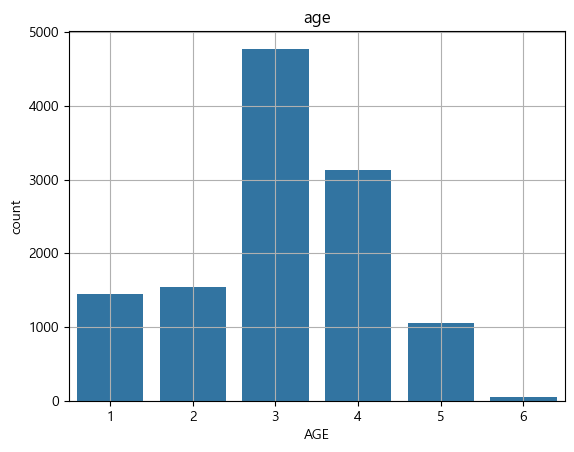

In [14]:
#[같이 하기] age에 대해 countplot 으로 시각화를 해보자!
# 1. sns.countplot(x=' ', data= )으로 시각화. 색상은 원하는 색상으로!
# 2. title=('age'), grid 도 넣어서 이쁘게 만들어보자.

sns.countplot(x='AGE',data=data)
plt.title('age')
plt.grid()
plt.show()

### 2) 고용상태

In [15]:
#[문제 8] '고용상태' 변수에 대해 범주별 빈도수를 탐색해보자.

data['고용상태'].value_counts()

고용상태
고용       7518
무직       3028
휴직       1094
FALSE     360
Name: count, dtype: int64

In [16]:
#[문제 9] 위 결과에 대해 비율로 계산해보자.

data['고용상태'].value_counts(normalize = True).sort_values()

고용상태
FALSE    0.030000
휴직       0.091167
무직       0.252333
고용       0.626500
Name: proportion, dtype: float64

In [17]:
#[문제 10] FALSE 값이 있잖어? 이게 뭐지?
# False를 무엇으로 해석해야 할까?

false_rows = data[data['고용상태'] == 'FALSE']
false_rows.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
149,150,3,피보험자,FALSE,0,12.898866,1,기본,석사,28438300,...,기혼,60,0,2,자주방문,할인,대리점,318000,컴팩트카,중
226,227,3,계약자,FALSE,0,13.943265,0,고급,고졸이하,19937500,...,기혼,130,0,2,비방문,할인,콜센터,682000,일반세단,대
298,299,3,계약자,FALSE,0,10.853136,1,중급,고졸이하,15635400,...,미혼,90,0,2,비방문,할인,대리점,706000,일반세단,대
382,383,4,피보험자,FALSE,1,6.524802,1,중급,대학졸업,36590400,...,기혼,90,0,4이상,자주방문,설계사독려,대리점,492000,컴팩트카,중
404,405,4,계약자,FALSE,1,5.006655,1,기본,대학졸업,37296600,...,미혼,60,0,3,비방문,할인,대리점,578000,컴팩트카,중


In [18]:
# 나이별 비율

false_rows = data[data['고용상태'] == 'FALSE']
print(false_rows['AGE'].value_counts(normalize=True) * 100)

print('\n------------------------------\n')

# 소득 구간별 비율

bins = [0, 10_000_000, 20_000_000, 30_000_000, 40_000_000, 50_000_000, 100_000_000]
labels = ['0~1천만원', '1천~2천만원', '2천~3천만원', '3천~4천만원', '4천~5천만원', '5천~1억원']

data['소득구간'] = pd.cut(data['소득'], bins=bins, labels=labels, right=False)

rate = data['소득구간'].value_counts(normalize=True).sort_values()

print(rate)


AGE
3    52.222222
4    43.611111
2     4.166667
Name: proportion, dtype: float64

------------------------------

소득구간
1천~2천만원    0.036496
4천~5천만원    0.091798
2천~3천만원    0.100177
3천~4천만원    0.122521
0~1천만원     0.281910
5천~1억원     0.367098
Name: proportion, dtype: float64


<b>**'고용상태' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**


In [ ]:
# False 가 무엇을 뜻하는 것일까?

# 3~40대가 약 96%, 20대가 약 4%  > 특정 연령대에 집중

# 고소득인 사람이 37% 정도로 제일 많고, 거의 없는 사람이 28%로 2번째.  > 소득층이 극단적으로 나뉨

# 업데이트가 안되서, 현재 휴직임에도 과거 소득이 현재 소득인 것 처럼 표시됐을 가능성은?

# 무직이라는 항목이 있으니 무직은 아닌 것 같고, 프리렌서 같은 무엇인가가 아닌지?

# 일용직처럼 보험처리가 안되는 일을 하고 있다고 가정하기엔 너무 고소득

# 사장이나 자영업자처럼 내가 고용을 하는 경우에도 '고용' 이라는 카테고리에 포함되는건지?

# 아니면, 고객이 그저 공개를 하고싶지 않아 그 어느것에도 표기하지 않은 일종의 결측치일지?

# 그 외

# 일을 하고 있는 인원 : 약 63%
# 일을 안하고 있는 인원 : 약 34%
# 미상 : 3%

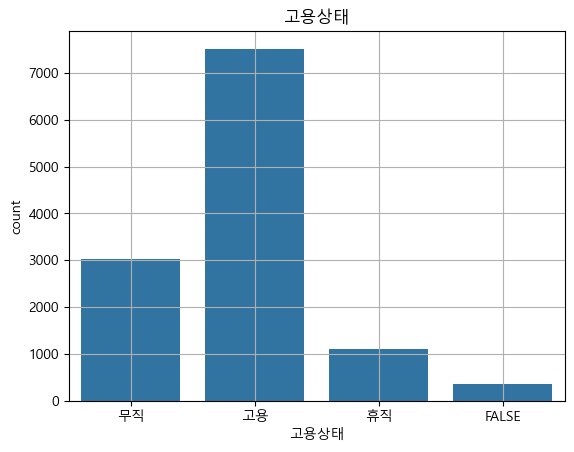

In [19]:
#[문제 11] '고용상태'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='고용상태',data=data)
plt.title('고용상태')
plt.grid()
plt.show()

### 3) 교육수준

In [20]:
#[문제 12] '교육수준' 변수에 대해 범주별 빈도수를 탐색해보자.

data['교육수준'].value_counts()

교육수준
대학졸업    7105
고졸이하    3477
석사       979
박사       439
Name: count, dtype: int64

In [21]:
#[문제 13] 위 결과에 대해 비율로 계산해보자.

data['교육수준'].value_counts(normalize = True).sort_values()

교육수준
박사      0.036583
석사      0.081583
고졸이하    0.289750
대학졸업    0.592083
Name: proportion, dtype: float64

<b>**'교육수준' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 대학졸업X : 29%
# 졸업 이상 : 71%

# 교육 수준이 높은 고객들은 복잡한 설계의 보험도 잘 이해할 가능성은 높으나, 그렇다고 복잡한 상품을 좋아하는 것은 분명 아닐 것.
# 교육 수준이 높지 않은 고객도 약 30%이니, 쉽고 접근성이 좋은 마케팅을 생각해보자

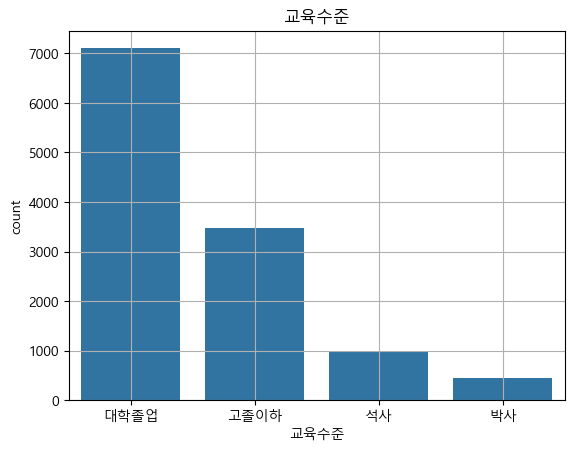

In [22]:
#[문제 14] '교육수준'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='교육수준',data=data)
plt.title('교육수준')
plt.grid()
plt.show()

### 4) 상품타입

In [23]:
#[문제 15] '상품타입'변수에 대해 범주별 비율을 탐색해보자.

data['상품타입'].value_counts(normalize = True).sort_values()

상품타입
고급    0.089583
중급    0.303917
기본    0.606500
Name: proportion, dtype: float64

<b>**'상품타입' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [24]:
# 기본이 61%  그 이상 39%

# 대부분의 고객이 가격 부담이 낮고, 최소한의 있을건 있는 기본형 보험 상품을 선택하는 경향이 있다고 생각.
# 즉, 무조건 소득에 따라 가입했다고 단순하게 생각할 건 아닐 것이다.

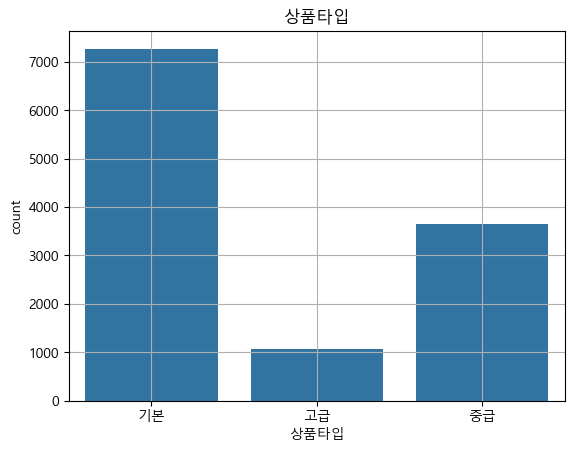

In [25]:
#[문제 16] '상품타입'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='상품타입',data=data)
plt.title('상품타입')
plt.grid()
plt.show()

### 5) 거주지사이즈

In [26]:
#[문제 17]'거주지사이즈'변수에 대해 범주별 비율을 탐색해보자.

data['거주지사이즈'].value_counts(normalize = True).sort_values()

거주지사이즈
대    0.103750
소    0.194333
중    0.701917
Name: proportion, dtype: float64

<b>**'거주지사이즈' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [27]:
# 소 : 20%
# 중 : 70%
# 대 : 10%

# 마찬가지로, 큰 집에 살수록 비싼 보험을 들었을 가능성은 분명 존재하지만,
# 큰 집에 산다 > 돈이 많다 > 고급형을 가지고 있을 것이다. 라는 단순한 생각은 자칫 오류를 유발할 수 있다.

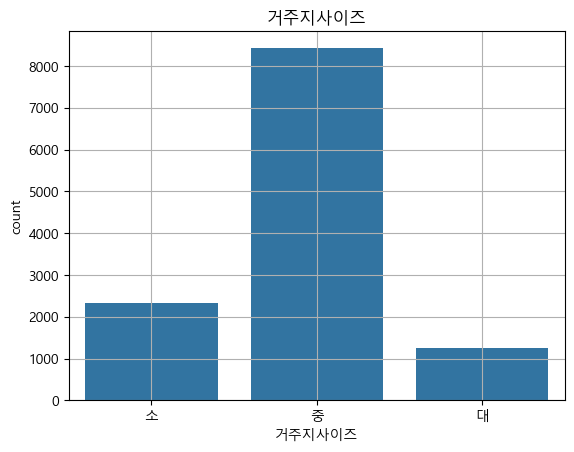

In [28]:
#[문제 18] '거주지사이즈'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='거주지사이즈',data=data)
plt.title('거주지사이즈')
plt.grid()
plt.show()

### 6) 자동차

In [29]:
#[문제 19]'자동차'변수에 대해 범주별 비율을 탐색해보자.

data['자동차'].value_counts(normalize = True).sort_values()

자동차
고급차     0.037833
스포츠카    0.054333
SUV     0.194667
컴팩트카    0.207000
일반세단    0.506167
Name: proportion, dtype: float64

<b>**'자동차' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [30]:
# 일반세단 : 51%
# 컴팩트카 : 21%
# SUV : 19%
# 스포츠카 및 고급차 9%

# 스포츠카와 고급차를 하나의 카테고리로 묶는게 편할 것 같다. > 둘 다 가격대가 높고, 비율이 적어 추후 분석에 용이할 것이라고 생각
# 위와 마찬가지로 비싼 차를 소유했을수록 고급형을 들었을 가능성은 분명 존재하지만,
# 비싼 차가 있다 > 돈이 많다 > 고급형을 가지고 있을 것이다. 라는 단순한 생각은 자칫 오류를 유발할 수 있다.

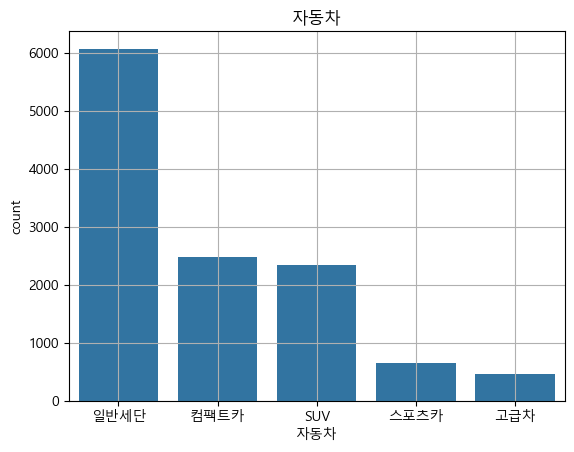

In [31]:
#[문제 20]'자동차'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x='자동차',data=data)
plt.title('자동차')
plt.grid()
plt.show()

## **(2) 도메인 주요 항목 컬럼 탐색하기**
* 도메인 주요 항목 : Willingness to pay/Stay,소득,월 납입액,타상품 보유 현황,총지불금액(총 5개 항목)
* 위 도메인 주요 항목 컬럼을 histplot 을 통해서 탐색해 보자

In [32]:
#[문제 21] 도메인 내 주요 항목 컬럼들이 수치형인지 문자형인지 알아보자! (info 활용)

data_domain = data[ ['Willingness to pay/Stay', '소득', '월 납입액', '타 상품 보유 현황', '총지불금액'] ]
data_domain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Willingness to pay/Stay  12000 non-null  float64
 1   소득                       12000 non-null  int64  
 2   월 납입액                    12000 non-null  int64  
 3   타 상품 보유 현황               12000 non-null  object 
 4   총지불금액                    12000 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 468.9+ KB


### 1) WTP(Willingness to pay/Stay)
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기


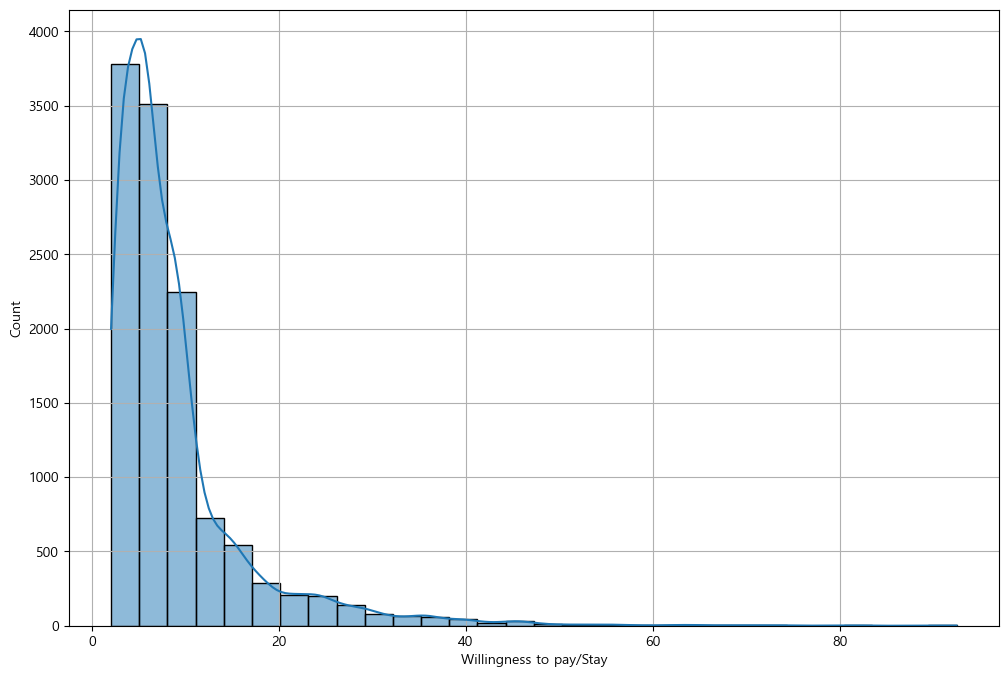

In [33]:
#[같이 하기] 히스토그램으로 'Willingness to pay/Stay(WTP)'에 대한 그래프를 그려보자.

# 1. figsize(12,8) 셋팅하기

plt.figure(figsize=(12,8))

# 2. histplot 그리기
# bins = 30, kde = True로 설정해서 그래프를 그려보자.

sns.histplot(data['Willingness to pay/Stay'],bins=30,kde=True)
plt.grid()
plt.show()

In [34]:
#[같이 하기] WTP의 평균값을 확인해보자(describe 사용)

data['Willingness to pay/Stay'].describe()

count    12000.000000
mean         8.859478
std          7.698885
min          2.045730
25%          4.373400
50%          6.384831
75%          9.867900
max         92.496300
Name: Willingness to pay/Stay, dtype: float64

<b>**'Willingness to pay/Stay(WTP)' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 고객의 보험유지 기대확률이 낮은것으로 보인다. (% 로 해석했을 경우)

### 2) 소득
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

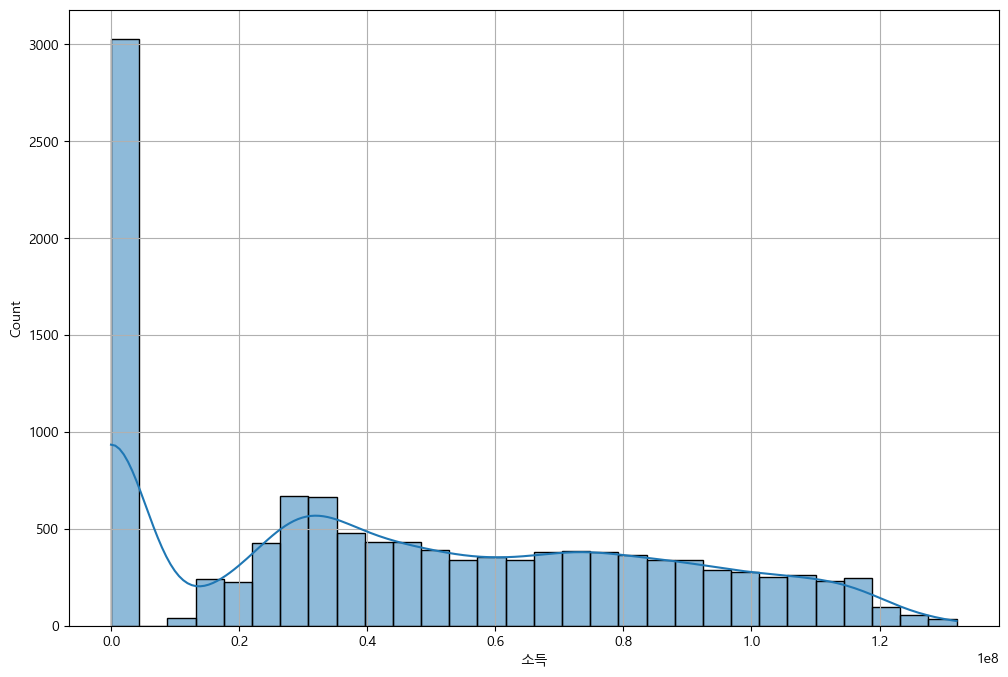

In [35]:
#[문제 22] 히스토그램으로 '소득'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자

plt.figure(figsize=(12,8))

sns.histplot(data['소득'],bins=30,kde=True)
plt.grid()
plt.show()

<b>**'소득' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 무직을 제외하면, 3천만원대가 제일 많고, 1천만원, 1.2억 이상은 매우 적지만, 그 외 모든 소득층은 유의미하게 차이가 나지는 않는다.
# 대다수가 저~중소득
# 소득이 0인 고객이 다수 존재 > 피보험자가 많은것으로 보인다. > 보험을 물려받는 경우라면 이들은 잠재 고객으로 봐도 무방
# 이들이 추후 가입했을때 첫 달(or 초기 몇 달) 혜택 관련하여 상품 개발 및 마케팅도 좋아보임.
# 소득이 0인 사람을 제외하고 군집화를 해볼 수 있을까?

### 3) 월 납입액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

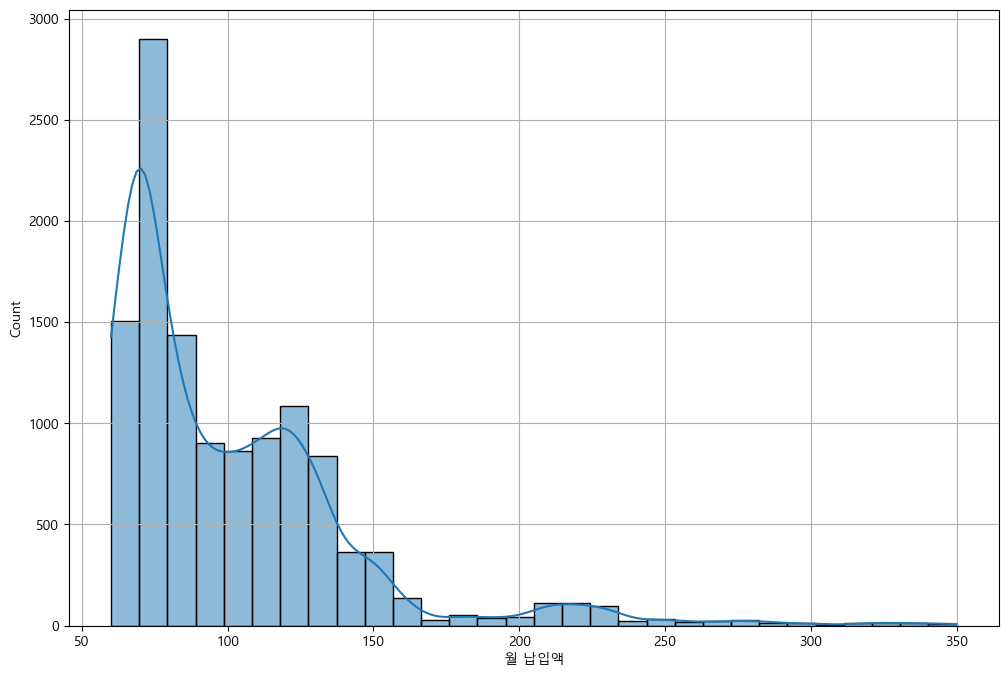

In [36]:
#[문제 23] 히스토그램으로 '월 납입액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자

plt.figure(figsize=(12,8))

sns.histplot(data['월 납입액'],bins=30,kde=True)
plt.grid()
plt.show()

In [37]:
#[문제 24] '월 납입액'의 평균값을 확인해보자(describe 사용)
data['월 납입액'].describe()

count    12000.000000
mean       100.065833
std         42.453750
min         60.000000
25%         70.000000
50%         90.000000
75%        120.000000
max        350.000000
Name: 월 납입액, dtype: float64

<b>**'월 납입액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 기본형의 비율이 높았던 만큼, 5~10만원을 납입하는 고객의 수가 많다.
# 이들이 더 많은 비용을 지불할 수 있도록 상위 상품들의 가치를 높히는 것도 좋을 것으로 보인다.

### 4) 타상품 보유
* 문자형/범주형 컬럼이기 때문에 범주 비율로 확인해보기

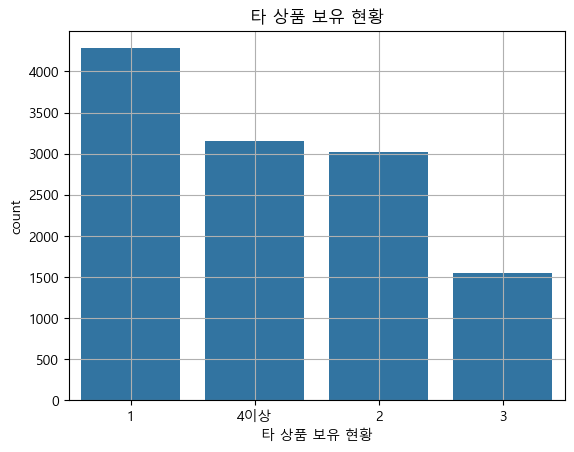

In [38]:
#[문제 25] '타상품 보유' 변수에 대해 범주별 비율을 확인하자.

sns.countplot(x='타 상품 보유 현황',data=data)
plt.title('타 상품 보유 현황')
plt.grid()
plt.show()

<b>**'타상품 보유' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 4개 이상 보유한 인원이 많다. 충성고객, 연계상품 등으로 마케팅해볼 듯 하다.
# 상당수 고객이 이미 복수의 보험상품을 보유하고 있다 > 상품의 중복된 혜택이 없도록 신경쓰고, 이를 알릴 필요가 있다.

### 5) 총지불금액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

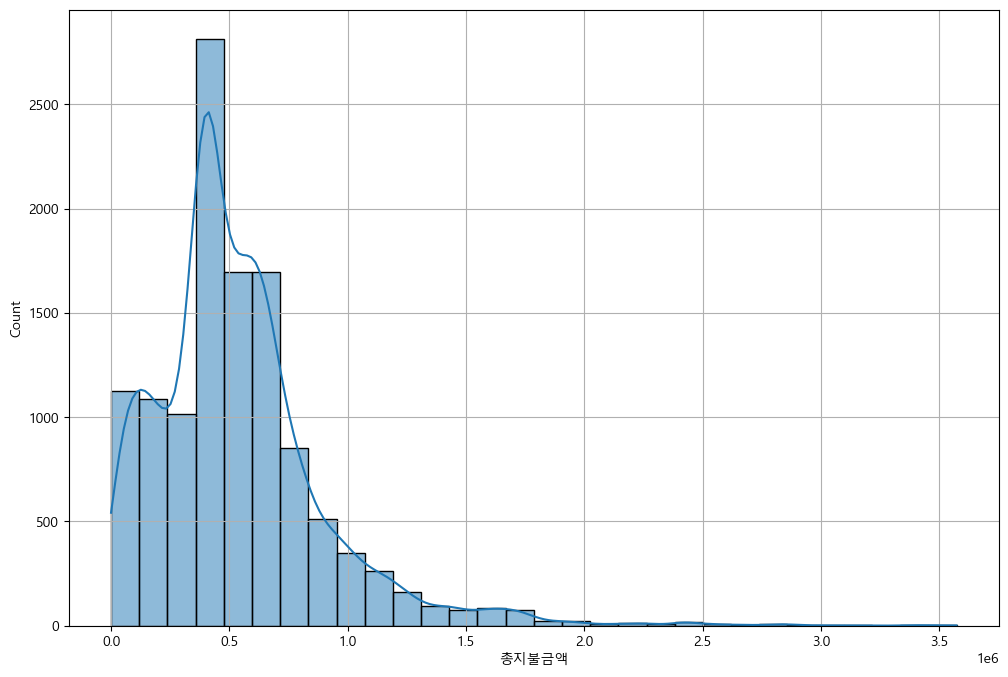

In [39]:
#[문제 26] 히스토그램으로 '총지불금액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자

plt.figure(figsize=(12,8))

sns.histplot(data['총지불금액'],bins=30,kde=True)
plt.grid()
plt.show()

In [40]:
#[문제 27] '총지불금액'의 평균값을 확인해보자(describe 사용)

data['총지불금액'].describe()

count    1.200000e+04
mean     5.355854e+05
std      3.587993e+05
min      0.000000e+00
25%      3.360000e+05
50%      4.740000e+05
75%      6.790000e+05
max      3.573000e+06
Name: 총지불금액, dtype: float64

<b>**'총 지불 금액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 40~70만원대가 가장 많다.
# 보험금 지급이 0원이거나 매우 적은 사람이 존재 > 혜택이 적다고 느껴져 이탈할 가능성도 있을 수 있다. 상품의 검토 필요
# 일부 고액수령자 존재

# **4. Mission 1-변수 탐색 결론**

* 수치형 컬럼 이외에도, 주요 변수 중 object 형태의 컬럼이 존재
* 수치형 컬럼은 단위가 각각 다르므로 스케일링 고려 필요
* 범주형 컬럼은 인코딩을 통해서 모델링을 위한 변환이 필요

<font color="1E90FF"><b>→ 데이터를 확인하고 탐색하여 전처리의 방향성 및 feature 값에 대한 이해 증대<b><br>
    

# <b>Mission 1 완료!
수고하셨습니다!

# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링

## **Mission 2. 데이터 전처리**

### [미션 이해하기]
* 여러분들은 K 보험사의 직원입니다. K 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[1일차] mission 2 목표<b>: 군집분석을 기반으로 하는 고객 segment 적용 전 주요 데이터 전처리를 수행해보기

---------------------------------------------------------------------------------------------
# **0. 환경설정(경로설정)**
* [필요시] 구글 colab 설정 방법
    - 경로 설정 : 구글 colab
        * 구글 드라이브 바로 밑에 dxproject 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.

In [ ]:
# 구글 드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Path
# path = '/content/drive/MyDrive/dxproject/'

---------------------------------------------------------------------------------------------
#### <b>[실습프로세스]<b>

1. 범주 인코딩
    * 각 범주별 0, 1로 인코딩 하기
2. 스케일링


---------------------------------------------------------------------------------------------
# **1. 범주 인코딩**
* 범주형 변수 값(텍스트) 을 수치형 값(숫자)으로 변환하는 방법을 사용하여 알고리즘이 인식할 수 있도록 변환해 봅시다.
* 범주 인코딩 방법은 Label-encoding 과 one-hot-encoding 등이 있습니다.
    * Label-encoding : 0, 1, 2, 3, ...
    * one-hot-encoding : 가변수화
* 우리는 어떻게 범주 인코딩을 할 수 있을까요?

## **(1) 데이터 불러오기**


In [41]:
#[문제 1] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 를 임포트 하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

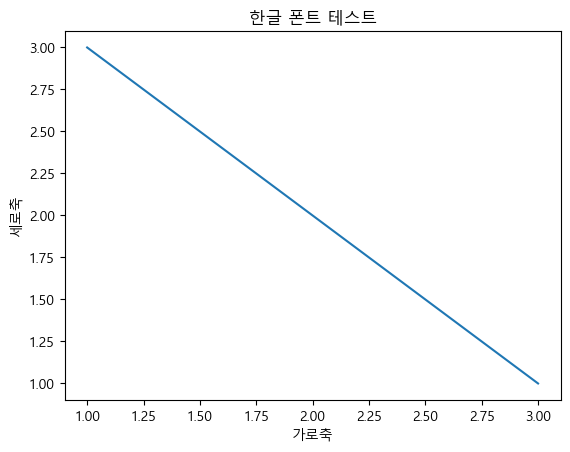

In [42]:
# 한글 세팅

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Windows용 폰트 설정 (예: Malgun Gothic)
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 확인용 그래프
plt.plot([1, 2, 3], [3, 2, 1])
plt.title("한글 폰트 테스트")
plt.xlabel("가로축")
plt.ylabel("세로축")
plt.show()

In [43]:
# [문제 2] 데이터 불러오기
# data 변수에 'customers_seg.csv' 파일을 불러오기

data = pd.read_csv('customers_seg.csv')

In [44]:
# [문제 3] 데이터 상위 5개 조회

data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


## **(2) 활용할 변수 선정하기**

In [45]:
# [문제 4] 데이터 셋의 모든 컬럼명(변수명)을 확인해보자.(columns로 확인)

data.columns

Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

In [46]:
# [문제 5] mission 1에서 선정한 11개의 변수만 가지고 있는 데이터 프레임 생성하기

# 1. data를 data_choice 변수에 copy 해놓기

data_choice = data.copy()

# 2. col 에 선정한 11개 변수를 리스트로 할당해보자.
# [참고] 11개 변수: 'AGE', '고용상태', 'Willingness to pay/Stay', '상품타입',
# '교육수준', '소득', '월 납입액','타 상품 보유 현황', '총지불금액', '거주지사이즈','자동차'



# 3.data_choice 변수에 col 할당 후 data_choice 데이터를 확인해보자.

data_choice = data[ ['AGE', '고용상태', 'Willingness to pay/Stay', '상품타입', '교육수준', '소득', '월 납입액', '타 상품 보유 현황', '총지불금액', '거주지사이즈', '자동차'] ]
data_choice

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,3,무직,2.616381,기본,대학졸업,0,80,1,631000,소,일반세단
1,1,고용,6.352530,기본,고졸이하,102887400,80,4이상,54000,중,일반세단
2,2,휴직,4.974354,기본,대학졸업,22159500,60,4이상,362000,중,일반세단
3,5,고용,13.480284,고급,고졸이하,51562500,110,2,1264000,대,컴팩트카
4,4,고용,9.776436,기본,석사,26820200,120,3,947000,중,SUV
...,...,...,...,...,...,...,...,...,...,...,...
11995,1,고용,25.985100,기본,대학졸업,86451000,70,2,245000,중,일반세단
11996,3,고용,3.441000,중급,대학졸업,25962000,80,1,468000,중,일반세단
11997,3,무직,9.057600,중급,대학졸업,0,90,2,977000,중,일반세단
11998,4,고용,8.347200,중급,대학졸업,26366000,100,3,854000,대,일반세단


## **(3) 범주 인코딩**

**[명목형(텍스트) 컬럼 처리하기]**
   * 순서의 의미가 없는 컬럼은 인코딩 시 주의! 변수의 의미를 고려하여 처리가 필요하다.
   * Mission 1에서 변수마다 탐색적 분석을 통해 의미를 찾아본 것을 활용해야한다.
   * 우리는 1 또는 0으로 이산화(두개의 범주로 구분)를 해보려고 한다.

In [47]:
# [문제 6] 범주형 변수가 무엇이 있는지 확인해보자(info 활용)

data_choice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   고용상태                     12000 non-null  object 
 2   Willingness to pay/Stay  12000 non-null  float64
 3   상품타입                     12000 non-null  object 
 4   교육수준                     12000 non-null  object 
 5   소득                       12000 non-null  int64  
 6   월 납입액                    12000 non-null  int64  
 7   타 상품 보유 현황               12000 non-null  object 
 8   총지불금액                    12000 non-null  int64  
 9   거주지사이즈                   12000 non-null  object 
 10  자동차                      12000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


---------------------------

**[Hint]**
- **<b>'고용상태', '상품 타입', '교육수준','거주지 사이즈','자동차'</b>** 는 다중범주로 순서에 의미가 없어 변수의 의미를 고려해서  <font color="1E90FF"><b>0과 1로 이산화로 범주 인코딩</font>
- **'타 상품 보유 현황'** 의 경우 숫자로 되어있는 범주에 <font color="1E90FF"><b>'4이상'의 범주의 '이상'이라는 문자열 제거</font>

---------------

### **1) 고용상태**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>

* 1-> 직업을 가지고 있으면서 소득이 발생하는 범주
* 0-> 직업이 없거나, 소득이 발생하지 않는 범주
* 특이하게 false 값 도 존재 하기 때문에 확인 필요

In [48]:
# [문제 7] '고용상태' 범주 종류 확인(.unique() 혹은 .value_counts())

data_choice['고용상태'].value_counts()

고용상태
고용       7518
무직       3028
휴직       1094
FALSE     360
Name: count, dtype: int64

In [49]:
# [같이 하기]'고용상태' 범주를 인코딩 해보기
# np.where 을 이용해서 조건에 따른 값으로 변환하기
# 고용상태가 '고용' 이면 1, 아니면 0

data_choice['고용상태'] = np.where(data_choice['고용상태'] == '고용', 1, 0)

C:\Users\User\AppData\Local\Temp\ipykernel_5544\987770040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['고용상태'] = np.where(data_choice['고용상태'] == '고용', 1, 0)


In [50]:
#[같이 하기] '고용상태'가 변환된 것을 확인해보기

data_choice.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,3,0,2.616381,기본,대학졸업,0,80,1,631000,소,일반세단
1,1,1,6.352530,기본,고졸이하,102887400,80,4이상,54000,중,일반세단
2,2,0,4.974354,기본,대학졸업,22159500,60,4이상,362000,중,일반세단
3,5,1,13.480284,고급,고졸이하,51562500,110,2,1264000,대,컴팩트카
4,4,1,9.776436,기본,석사,26820200,120,3,947000,중,SUV


<b> why? Labelencoding 과 one-hot-encoding을 안하는가?
   > Label encoding을 하면 범주 수에 따라서 0~n 까지 나눠지기 때문에 이진의 의미를 할 수가 없다. (ex.고용상태 기준 --> false 0, 고용1, 무직2, 휴직3)
    <br> 연속적수치값으로 변환하는데 수치적 의미가 차이가 없고 3개 이상 범주는 주의해서 사용해야한다.
    <br> one-hot-encoding은 범주형 변수를 k개 변수로 변환하는데 범주수 만큼 열이 확대가 되어서...컨트롤하고 분석하기가 힘들다
    <br>가끔 이런 단순한 방법이 더 좋을 때도 있다( 간단하게 분석하는 경우...)

### **2) 상품타입**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>

* 1-> 약 9%를 가지고 있는 고급형
* 0-> 약 91%를 가지고 있는 기본, 중급형
* 고급형을 가지고 있는 집단과, 그 외 집단으로 분류

In [51]:
# [문제 8] '상품타입' 범주와 비율 확인

data_choice['상품타입'].value_counts()

상품타입
기본    7278
중급    3647
고급    1075
Name: count, dtype: int64

In [52]:
data_choice['상품타입'].value_counts(normalize = True).sort_values()

상품타입
고급    0.089583
중급    0.303917
기본    0.606500
Name: proportion, dtype: float64

In [53]:
# [문제 9]'상품타입'범주를 인코딩 해보기
# '상품타입'이 '고급' 1, 아니면 0

data_choice['상품타입'] = np.where(data_choice['상품타입'] == '고급', 1, 0)

C:\Users\User\AppData\Local\Temp\ipykernel_5544\3591727172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['상품타입'] = np.where(data_choice['상품타입'] == '고급', 1, 0)


In [54]:
#[문제 10] '상품타입'이 변환된 것을 확인해보기

data_choice.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,3,0,2.616381,0,대학졸업,0,80,1,631000,소,일반세단
1,1,1,6.352530,0,고졸이하,102887400,80,4이상,54000,중,일반세단
2,2,0,4.974354,0,대학졸업,22159500,60,4이상,362000,중,일반세단
3,5,1,13.480284,1,고졸이하,51562500,110,2,1264000,대,컴팩트카
4,4,1,9.776436,0,석사,26820200,120,3,947000,중,SUV


### **3) 교육수준**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>
* 1-> 약 12%를 가지고 있는 석/박사
* 0-> 약 88%의 비중을 가지고 있는 고졸이하, 대학졸업자
* 교육수준이 높은 집단과, 그 외 집단으로 분류할 수 있을 것 같음

In [55]:
#[문제 11] '교육수준' 범주와 비율 확인

data_choice['교육수준'].value_counts()

교육수준
대학졸업    7105
고졸이하    3477
석사       979
박사       439
Name: count, dtype: int64

In [56]:
data_choice['교육수준'].value_counts(normalize = True).sort_values()

교육수준
박사      0.036583
석사      0.081583
고졸이하    0.289750
대학졸업    0.592083
Name: proportion, dtype: float64

In [57]:
#[문제 12]'교육수준' 범주를 인코딩 해보기
# '교육수준'이 '석사' 혹은 '박사'이면 1, 아니면 0

data_choice['교육수준'] = np.where((data_choice['교육수준'] == '석사') | (data_choice['교육수준'] == '박사'), 1, 0)

C:\Users\User\AppData\Local\Temp\ipykernel_5544\743768849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['교육수준'] = np.where((data_choice['교육수준'] == '석사') | (data_choice['교육수준'] == '박사'), 1, 0)


In [58]:
#[문제 13] '교육수준'이 변환된 것을 확인해보기

data_choice.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,3,0,2.616381,0,0,0,80,1,631000,소,일반세단
1,1,1,6.352530,0,0,102887400,80,4이상,54000,중,일반세단
2,2,0,4.974354,0,0,22159500,60,4이상,362000,중,일반세단
3,5,1,13.480284,1,0,51562500,110,2,1264000,대,컴팩트카
4,4,1,9.776436,0,1,26820200,120,3,947000,중,SUV


### **4) 타 상품 보유 현황**
<font color="1E90FF"><b>★ 범주의 1-4까지가 의미를 가지는 범주를 인코딩 해보자.</font>
* 4 이상의 타상품 보유하는 경우 유의미한 데이터로 가질 수 있어 순서의 의미를 살려서 인코딩 진행

In [59]:
#[문제 14] '타 상품 보유 현황' 범주와 비율 확인

data_choice['타 상품 보유 현황'].value_counts()

타 상품 보유 현황
1      4283
4이상    3155
2      3017
3      1545
Name: count, dtype: int64

In [60]:
data_choice['타 상품 보유 현황'].value_counts(normalize = True).sort_values()

타 상품 보유 현황
3      0.128750
2      0.251417
4이상    0.262917
1      0.356917
Name: proportion, dtype: float64

In [61]:
# [문제 15] 문자열 제거 하기
# '타 상품 보유 현황'은 숫자형 이지만, 4이상의 '이상'이라는 문자열을 제거해서 정리가 필요
# np.where를 이용해서 '이상'을 제거해 봅시다.

data_choice['타 상품 보유 현황'] = np.where(data_choice['타 상품 보유 현황'] == '4이상', '4', data_choice['타 상품 보유 현황'])
data_choice['타 상품 보유 현황'] = data_choice['타 상품 보유 현황'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_5544\4051147462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['타 상품 보유 현황'] = np.where(data_choice['타 상품 보유 현황'] == '4이상', '4', data_choice['타 상품 보유 현황'])
C:\Users\User\AppData\Local\Temp\ipykernel_5544\4051147462.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['타 상품 보유 현황'] = data_choice['타 상품 보유 현황'].astype(int)


In [62]:
#[문제 16]'타 상품 보유 현황'이 변환된 것을 확인해보기

data_choice.head(10)

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,3,0,2.616381,0,0,0,80,1,631000,소,일반세단
1,1,1,6.352530,0,0,102887400,80,4,54000,중,일반세단
2,2,0,4.974354,0,0,22159500,60,4,362000,중,일반세단
3,5,1,13.480284,1,0,51562500,110,2,1264000,대,컴팩트카
4,4,1,9.776436,0,1,26820200,120,3,947000,중,SUV
5,3,1,8.376726,0,0,61046700,70,2,3000,중,컴팩트카
6,3,0,6.029520,0,0,15756400,70,4,439000,중,일반세단
7,1,1,3.725382,0,0,128436000,90,1,40000,중,일반세단
8,3,1,9.754902,0,0,56500400,130,4,125000,중,SUV
9,2,0,7.396929,0,0,0,60,2,50000,중,컴팩트카


### **5) 거주지 사이즈**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>
* 1-> 약 10%를 가지고 있는 거주지 대
* 0-> 약 90%를 가지고 있는 중,소
* 거주지의 사이즈가 대로 가지고 있는 집단과, 그 외 집단으로 분류할 수 있을 것 같음

In [63]:
#[문제 17] '거주지사이즈' 범주와 비율 확인

data_choice['거주지사이즈'].value_counts()

거주지사이즈
중    8423
소    2332
대    1245
Name: count, dtype: int64

In [64]:
data_choice['거주지사이즈'].value_counts(normalize = True).sort_values()

거주지사이즈
대    0.103750
소    0.194333
중    0.701917
Name: proportion, dtype: float64

In [65]:
#[문제 18]'거주지사이즈' 범주를 인코딩 해보기
# '대'를 1, 나머지를 0

data_choice['거주지사이즈'] = np.where(data_choice['거주지사이즈'] == '대', 1, 0)

C:\Users\User\AppData\Local\Temp\ipykernel_5544\2010450896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['거주지사이즈'] = np.where(data_choice['거주지사이즈'] == '대', 1, 0)


In [66]:
#[문제 19]'거주지사이즈'가 변환된 것을 확인해보기

data_choice.head(10)

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,3,0,2.616381,0,0,0,80,1,631000,0,일반세단
1,1,1,6.352530,0,0,102887400,80,4,54000,0,일반세단
2,2,0,4.974354,0,0,22159500,60,4,362000,0,일반세단
3,5,1,13.480284,1,0,51562500,110,2,1264000,1,컴팩트카
4,4,1,9.776436,0,1,26820200,120,3,947000,0,SUV
5,3,1,8.376726,0,0,61046700,70,2,3000,0,컴팩트카
6,3,0,6.029520,0,0,15756400,70,4,439000,0,일반세단
7,1,1,3.725382,0,0,128436000,90,1,40000,0,일반세단
8,3,1,9.754902,0,0,56500400,130,4,125000,0,SUV
9,2,0,7.396929,0,0,0,60,2,50000,0,컴팩트카


### **6) 자동차**
<font color="1E90FF"><b>★ 다중범주로 순서에 의미가 없기에 변수의 의미를 고려해서 인코딩 해보자.</font>
* 1-> 약 9%를 가지고 있는 고급차/스포츠카
* 0-> 약 91%를 가지고 있는 그외(일반세단, 컴팩트카,suv)
* 고급형(고급차.스포츠카)와 그 외의 집단으로 분류할 수 있을 것 같음(소득에 연관)

In [67]:
#[문제 20] '자동차' 범주와 비율 확인

data_choice['자동차'].value_counts()

자동차
일반세단    6074
컴팩트카    2484
SUV     2336
스포츠카     652
고급차      454
Name: count, dtype: int64

In [68]:
data_choice['자동차'].value_counts(normalize = True).sort_values()

자동차
고급차     0.037833
스포츠카    0.054333
SUV     0.194667
컴팩트카    0.207000
일반세단    0.506167
Name: proportion, dtype: float64

In [69]:
#[문제 21]'자동차' 범주를 인코딩 해보기
# 고급차,스포츠카를 1로. 나머지는 0

data_choice['자동차'] = np.where((data_choice['자동차'] == '고급차') | (data_choice['자동차'] == '스포츠카'), 1, 0)

C:\Users\User\AppData\Local\Temp\ipykernel_5544\3313958953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_choice['자동차'] = np.where((data_choice['자동차'] == '고급차') | (data_choice['자동차'] == '스포츠카'), 1, 0)


In [70]:
#[문제 22] '자동차'가 변환된 것을 확인해보기

data_choice.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,3,0,2.616381,0,0,0,80,1,631000,0,0
1,1,1,6.352530,0,0,102887400,80,4,54000,0,0
2,2,0,4.974354,0,0,22159500,60,4,362000,0,0
3,5,1,13.480284,1,0,51562500,110,2,1264000,1,0
4,4,1,9.776436,0,1,26820200,120,3,947000,0,0


In [71]:
data_choice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   고용상태                     12000 non-null  int64  
 2   Willingness to pay/Stay  12000 non-null  float64
 3   상품타입                     12000 non-null  int64  
 4   교육수준                     12000 non-null  int64  
 5   소득                       12000 non-null  int64  
 6   월 납입액                    12000 non-null  int64  
 7   타 상품 보유 현황               12000 non-null  int64  
 8   총지불금액                    12000 non-null  int64  
 9   거주지사이즈                   12000 non-null  int64  
 10  자동차                      12000 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.0 MB


<font color="1E90FF"><b> 범주형(Object) -> 수치형으로 변경 완료!</span>

# **2. 스케일링**
* 컬럼별 수치의 단위가 다른 것을 확인 하였고, 컬럼별 범위를 조정하는 것이 필요한 상황이다.
* 범위를 일원화 시키기 위해서는 스케일링이 필요로 하다.
    * 종류는 'min-max scaling' 과 'standard scaling' 이 있는데 우리는 'standard scaling'을 통해서 변환 해보자.

In [72]:
#[문제 23] standard-scaling을 해보자.

# 1. standard-scaler import!(sklearn의 processing 활용)
from sklearn.preprocessing import StandardScaler


# 2. scaler라는 변수에  StandardScaler 넣어주기
cols = ['AGE', '고용상태', 'Willingness to pay/Stay', '상품타입', '교육수준', '소득', '월 납입액', '타 상품 보유 현황', '총지불금액', '거주지사이즈', '자동차']

scaler = StandardScaler()


# 3. 'data_choice'을  fit_transform 하여 'data_sc'로 저장
# 단, 데이터프레임을 스케일링하면, 결과가 넘파이 어레이로 나온다.
# 그래서 데이터프레임으로 다시 변환할 필요가 있다.(이때 칼럼 이름 필요)
data_sc = scaler.fit_transform(data_choice)
data_sc = pd.DataFrame(data_sc, columns=cols)


In [73]:
# [문제 24] 스케일링이 잘 되었는지 'data_sc' 데이터를 확인해보자
data_sc.head()


,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,-0.070427,-1.295136,-0.810943,-0.313685,-0.366062,-1.242413,-0.472671,-1.078127,0.265939,-0.340235,-0.318628
1,-1.853401,0.772120,-0.325638,-0.313685,-0.366062,1.511484,-0.472671,1.414331,-1.342270,-0.340235,-0.318628
2,-0.961914,-1.295136,-0.504656,-0.313685,-0.366062,-0.649289,-0.943792,1.414331,-0.483815,-0.340235,-0.318628
3,1.712546,0.772120,0.600217,3.187913,-0.366062,0.137715,0.234009,-0.247307,2.030230,2.939142,-0.318628
4,0.821059,0.772120,0.119108,-0.313685,2.731780,-0.524540,0.469570,0.583512,1.146690,-0.340235,-0.318628


In [74]:
#[문제 25] 데이터 내보내기
# 2일차에 모델링에 활용하기 위해 내보내기를 해보자.
# data_sc 를 data_sc.csv 파일로 저장(to_csv 활용)
# index=False 파라미터를 설정해 줘야지 unnamed:0번 추가 인덱스가 안생기기에 꼭! 넣어서 저장!

data_sc.to_csv('data_sc.csv', index=False)

In [75]:
#[문제 26] 데이터가 잘 들어갔는지 read_csv 활용해서 'data_sc.csv' 확인

data_loaded = pd.read_csv('data_sc.csv')
data_loaded.head()


,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,-0.070427,-1.295136,-0.810943,-0.313685,-0.366062,-1.242413,-0.472671,-1.078127,0.265939,-0.340235,-0.318628
1,-1.853401,0.772120,-0.325638,-0.313685,-0.366062,1.511484,-0.472671,1.414331,-1.342270,-0.340235,-0.318628
2,-0.961914,-1.295136,-0.504656,-0.313685,-0.366062,-0.649289,-0.943792,1.414331,-0.483815,-0.340235,-0.318628
3,1.712546,0.772120,0.600217,3.187913,-0.366062,0.137715,0.234009,-0.247307,2.030230,2.939142,-0.318628
4,0.821059,0.772120,0.119108,-0.313685,2.731780,-0.524540,0.469570,0.583512,1.146690,-0.340235,-0.318628


# **3. Mission 2-데이터 전처리 결론**

* 군집화 모델링을 하기 위해 범주형,수치형별 데이터 전처리가 필요했고 전처리 진행 완료
* 범주형은 수치형으로 변환을 하기 위해 인코딩 과정을 진행
* 단위가 각각 다른 수치형을 스케일링을 통해 모델 적용을 위한 기본 셋팅으로 변환

<font color="1E90FF"><b>→ 모델을 돌리기 전 데이터에 대한 이해도를 바탕으로 데이터의 전처리 진행(스케일링)<b><br>  

# <b>Mission 2 완료!
수고하셨습니다!

# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링

## **Mission 3. 분석 모델 개발**

### [미션 이해하기]
* 여러분들은 K 보험사의 직원입니다. K보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[2일차] mission 3 목표<b>: 전처리 한 데이터를 활용하여 군집분석 하고, 데이터 탐색 기반 프로파일링을 통해 군집별 특징 정의 해보기

---------------------------------------------------------------------------------------------
# **0. 환경설정(경로설정)**
* [필요시] 구글 colab 설정 방법
    - 경로 설정 : 구글 colab
        * 구글 드라이브 바로 밑에 dxproject 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.

In [ ]:
# 구글 드라이브 연결
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Path
# path = '/content/drive/MyDrive/dxproject/'

---------------------------------------------------------------------------------------------
#### <b>[실습프로세스]<b>

1. k-means 군집분석
2. 프로파일링

---------------------------------------------------------------------------------------------
# **1. k-means 모델(군집 분석)**

**k-means 모델이란?**
 > **비지도학습의 대표적인 군집분석을 위한 모델로 주어진 데이터를 K개의 클러스터로 묶는 알고리즘**
 > * K 군집의 초기 중심에서 시작해서 중심을 바꾸는 단계를 사용하여 데이터를 가장 가까운 군집으로 포함시켜 분류하는 모델
 > * 장점: 단순 알고리즘 및 빠른 연산 속도
 > * 단점: 이상치, 노이즈에 민감하고 초기 군집 수 결정 단계가 필요함

## **(1) 데이터 불러오기**

In [76]:
# 필요 라이브러리 로딩

import numpy as np
import pandas as pd
import seaborn as sns
import os

# mosaic
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
#(참고)
# from matplotlib import font_manager, rc
# font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

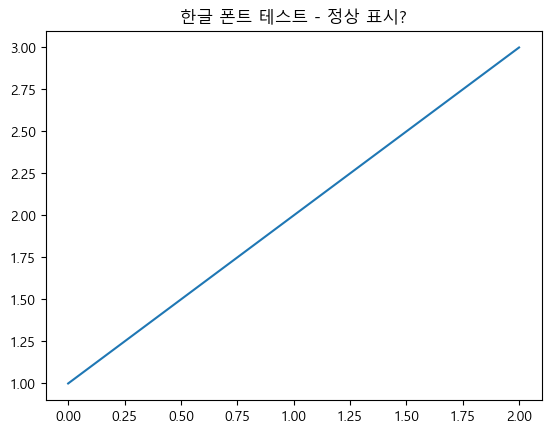

In [77]:
# 한글 세팅 참고 1
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import platform

# 1) 선호 폰트 후보(설치되어 있는 것 위주)
candidates = {
    "Windows": ["Malgun Gothic", "맑은 고딕"]
}

system = platform.system()
fonts_to_try = candidates.get(system, []) + ["NanumGothic"]  # 최후 fallback

# 2) 폰트가 실제로 있는지 검사 후 적용
available = set(f.name for f in fm.fontManager.ttflist)
for name in fonts_to_try:
    if name in available:
        mpl.rcParams["font.family"] = name
        break

# 3) 마이너스 깨짐 방지
mpl.rcParams["axes.unicode_minus"] = False

# 테스트
plt.plot([1,2,3])
plt.title("한글 폰트 테스트 - 정상 표시?")
plt.show()

In [ ]:
# # 한글 세팅 참고 2

# import matplotlib.pyplot as plt
# from matplotlib import rcParams

# # Windows용 폰트 설정 (예: Malgun Gothic)
# rcParams['font.family'] = 'Malgun Gothic'
# rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# # 지수표현(소수점 2자리까지 나타내기)
# pd.options.display.float_format = '{:.2f}'.format

# # 확인용 그래프
# plt.plot([1, 2, 3], [3, 2, 1])
# plt.title("한글 폰트 테스트")
# plt.xlabel("가로축")
# plt.ylabel("세로축")
# plt.show()

In [78]:
# [문제 1~2] 스케일링 한 데이터 불러오기
# 1. data 변수에 'data_sc.csv' 파일을 불러와서 할당
# 2. data 변수 호출해서 상위 5개 확인해보기

data = pd.read_csv('data_sc.csv')
data.head()


#[참고] colab으로 진행할 때
#data = pd.read_csv(path+'customers_seg.csv')

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,-0.070427,-1.295136,-0.810943,-0.313685,-0.366062,-1.242413,-0.472671,-1.078127,0.265939,-0.340235,-0.318628
1,-1.853401,0.772120,-0.325638,-0.313685,-0.366062,1.511484,-0.472671,1.414331,-1.342270,-0.340235,-0.318628
2,-0.961914,-1.295136,-0.504656,-0.313685,-0.366062,-0.649289,-0.943792,1.414331,-0.483815,-0.340235,-0.318628
3,1.712546,0.772120,0.600217,3.187913,-0.366062,0.137715,0.234009,-0.247307,2.030230,2.939142,-0.318628
4,0.821059,0.772120,0.119108,-0.313685,2.731780,-0.524540,0.469570,0.583512,1.146690,-0.340235,-0.318628


## **(2) 군집분석**

<b>군집분석을 위해 최적의 그룹 k 값을 찾아보고 최적의 군집 수를 결정해 보자

### <b>**1) 기본 셋팅**
* yellowbrick을 임포트 해서 군집분석 해보기

In [ ]:
#[같이 하기] yellowbrick이 없는 경우 pip로 설치해 주기(!pip install yellowbrick)

!pip install yellowbrick

In [79]:
# [같이 하기] k-means, yellowbrick의 KElbowVisualizer 불러오기

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

### <b>**2) 직접 하나하나 해보기**
* 몇 개의 그룹으로 군집화를 할지 k 값을 바꿔 가면서 '최적의 k 값'을 찾아보는 것을 해보자.

In [80]:
# [같이 하기] 군집화할 그룹(k) 결정하기

# 우리는 먼저 몇개의 그룹으로 군집화 할지 3~10까지 수 중에서 결정하려고 3부터 2씩 올려서 클러스터링을 해보려고 한다.
# 그러면 3개의 그룹부터 시작해 보자.


# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k에 할당)
k=3

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용)
# 동일값을 위해 random_state=2024, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_1 = KMeans(n_clusters=k, random_state=2025, n_init=10)

#3. 스케일링 된 데이터에 학습

model_1.fit(data)


KMeans(n_clusters=3, n_init=10, random_state=2025)

In [81]:
# [같이 하기] 모델이 찾은 3개의 센트로이드를 확인해보자.
# 센트로이드는 하나의 클러스터(k) 내 데이터의 중심이 되는 점이다.

model_1.cluster_centers_

array([[ 4.88049782e-01, -1.90094636e-02,  9.60478228e-01,
         3.82556384e-01,  3.08332347e-02, -9.79321872e-02,
         1.96112485e+00, -1.24092981e-03,  1.32373964e+00,
        -1.01150505e-02,  2.78181889e+00],
       [-1.16076561e-01, -1.29462172e+00, -1.44160718e-01,
        -4.47328497e-02, -1.20421193e-01, -1.02601510e+00,
        -1.98875680e-01, -3.82325582e-03,  2.58818496e-01,
         3.39217449e-02, -3.16909296e-01],
       [-1.76619679e-02,  7.72119935e-01, -8.48024005e-02,
        -4.13095969e-02,  6.60358541e-02,  6.26623358e-01,
        -2.29844311e-01,  2.49041414e-03, -3.88540494e-01,
        -1.83481755e-02, -3.05360916e-01]])

In [82]:
# [같이 하기] 3가지 성능지표를 통해서 확인해보기

# 1. inertia(이너셔) : 각 데이터와 센트로이드(중심) 사이의 평균 제곱거리로 도출한 모델 (model.inertia_로 쓴다)
# 2. score 매서드: 이너셔의 음수값을 반환( model.score(df))

print(model_1.inertia_)
print(model_1.score(data))

93559.51847749636
-93559.51847749636


<b> k=3을 같이 해봤으니 이제 여러분들이 한번 그룹수(k)를 바꿔가면서 판단을 해보실 차례입니다!
<br>2씩 늘려가면서 k값을 5,7,9개의 그룹으로 나눠서 모델 학습 시키고 성능지표를 확인해 보세요!

In [83]:
#[문제 3] 군집화할 그룹(k)을 5개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k1에 할당)
k1=5

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_2 에 할당)
# 동일값을 위해 random_state=2025, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_2 = KMeans(n_clusters=k1, random_state=2025, n_init=10)

#3. 스케일링 된 데이터에 학습

model_2.fit(data)

#4. 학습한 결과 inertia,score 로 확인 해보기

print(model_2.inertia_)
print(model_2.score(data))

74062.29216676277
-74062.29216676277


In [84]:
#[문제 4] 군집화할 그룹(k)을 7개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k2에 할당)

k2=7

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_3 에 할당)
# 동일값을 위해 random_state=2025, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_3 = KMeans(n_clusters=k2, random_state=2025, n_init=10)

#3. 스케일링 된 데이터에 학습

model_3.fit(data)

#4. 학습한 결과 inertia,score 로 확인 해보기

print(model_3.inertia_)
print(model_3.score(data))

60258.67316591433
-60258.67316591433


In [85]:
#[문제 5] 군집화할 그룹(k)을 9개로 해보자.

# 1.몇개의 그룹(k)으로 군집화 할지 임의로 정해보기(k3에 할당)

k3=9

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_4 에 할당)
# 동일값을 위해 random_state=2025, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init 지정 : warning을 없애기 위해 지정해준다.

model_4 = KMeans(n_clusters=k3, random_state=2025, n_init=10)

#3. 스케일링 된 데이터에 학습

model_4.fit(data)

#4. 학습한 결과 inertia,score 로 확인 해보기

print(model_4.inertia_)
print(model_4.score(data))

54309.68319625133
-54309.68319625133


-----------

* <b>for 문을 활용해서 그래프로도 확인을 해볼까요?

n_cluster:2, inertia:110876.94724021043
---------
n_cluster:3, inertia:93559.51847749636
---------
n_cluster:4, inertia:83208.14209135536
---------
n_cluster:5, inertia:74062.29216676277
---------
n_cluster:6, inertia:66665.31836457558
---------
n_cluster:7, inertia:60258.67316591433
---------
n_cluster:8, inertia:56808.90370391046
---------
n_cluster:9, inertia:54309.68319625133
---------
n_cluster:10, inertia:51844.328837319765
---------
n_cluster:11, inertia:49535.71002495203
---------
n_cluster:12, inertia:47191.710498645654
---------
n_cluster:13, inertia:45318.90286542984
---------
n_cluster:14, inertia:44023.52896538682
---------
n_cluster:15, inertia:42877.945101185265
---------
n_cluster:16, inertia:40928.60880937564
---------
n_cluster:17, inertia:39852.44358089783
---------
n_cluster:18, inertia:38710.40223225135
---------
n_cluster:19, inertia:37781.98855727173
---------
n_cluster:20, inertia:36717.03832410472
---------


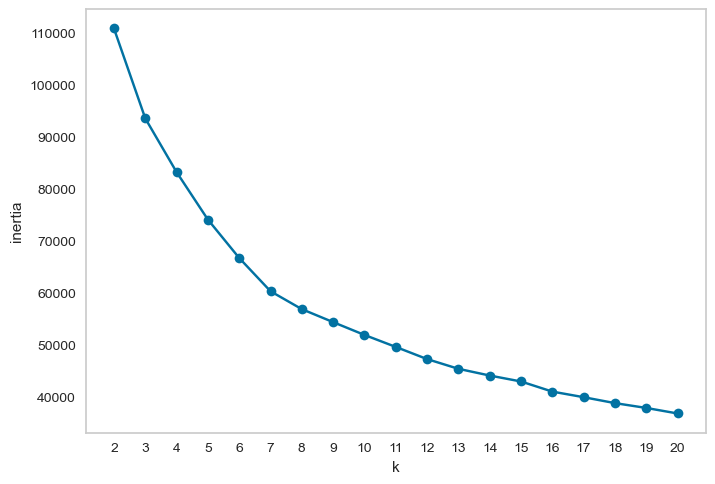

In [86]:
#[문제 6] for 문을 활용해서 2~20까지 k값을 넣어서 성능지표 확인하기

ks = range(2,21)       # k값 범위 지정(range 활용) 후 ks 변수에 할당
inertias = []  # 이너셔 결과를 저장하기 위한 빈 리스트 생성 (변수명 inertias)

for k  in ks  : # for문 활용
    model = KMeans(n_clusters=k, random_state=2025, n_init=10)            # k-means 모델 만들기(그룹수 : n_clusters 파라미터 사용,n_init=10)
    model.fit(data)                    # 모델 학습
    inertias.append(model.inertia_)                    # 이너셔 결과를 inertias 리스트에 계속 저장(append 활용)
    print('n_cluster:{}, inertia:{}'.format(k, model.inertia_))
    print('---------') # n_cluster, inertia 결과 출력


plt.Figure(figsize=(15,6))
plt.plot(ks,inertias,'-o') # '-o'는 실선과 원을 같이 시각화
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.grid()
plt.show()

여기서는 확실하게 어떤 k 값이 좋은지 파악하기가 힘들긴 하네요

### <b>**3) Elbow Method 활용해서 k 값 구하기**
* yellowbrick의 k-Elbow Mehod를 활용해서 최적의 k 값을 구하기(k값 결정하기 쉽게 도와주는 함수)

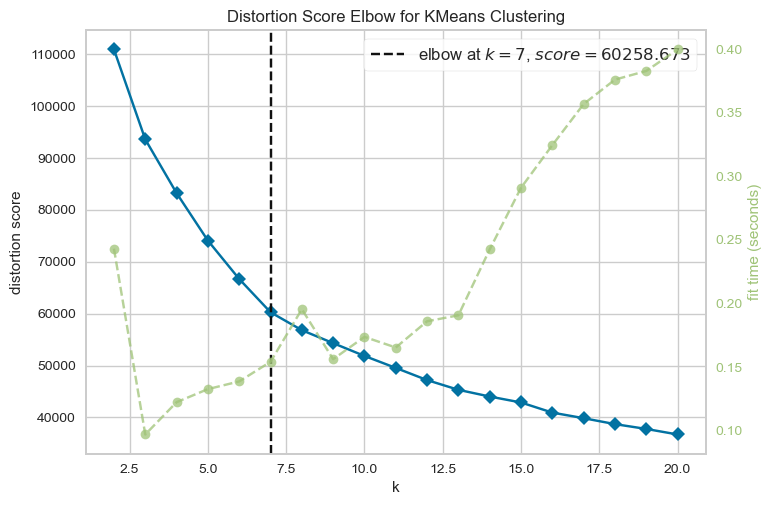

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
#[문제 7] Elbow Method를 통해 최적의 군집 수 도출을 해보자.

# 1. 모델 선언하기(random_state=2025, n_init = 10 으로 설정)(model_E로 할당)

model_E = KMeans(random_state=2025, n_init=10)

# 2. KElbowVisualizer 에 k-means 모델과 k값 넣어서 만들기(Elbow_M 에 할당)
# k값은 k=(2,21)사이의 값중에서 찾는 것으로 넣으면 된다.

Elbow_M = KElbowVisualizer(model_E, k=(2,21))

# 3. Elbow 모델 학습하기(fit)

Elbow_M.fit(data)

# 4. Elbow 모델 확인하기(show()활용)

Elbow_M.show()

### <b>**4) 최적의 k 값으로 모델링**
* Elbow Method를 통해 나온 최적의 k값으로 모델링을 해보자.

In [88]:
# [문제 8] 원본 데이터('customers_seg.csv') 불러오기

# 1. scale이 안된 원본 data에 clust를 맵핑 시키기 위해 원본 데이터('customers_seg.csv')도 불러옵시다
# data0 라는 변수에 할당하기
data0 = pd.read_csv('customers_seg.csv')

# 2. 'CID'는 활용하지 않을 예정으로 삭제합니다.

data0 = data0.drop('CID', axis=1)

# 3. 데이터 상위 5개 확인하기

data0.head()

,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [89]:
# [문제 9] 최적의 k 값으로 k-means 모델을 구성해보자.

#1.최적의 k 값으로 군집 수 선택 (k4에 할당)
k4=7

# 2. 모델 만들기 (그룹수 : n_clusters 파라미터 사용) (model_B 에 할당)
# 동일값을 위해 random_state=2025, n_init=10으로 설정값을 같이 해본다.
# [참고]n_init의 기본 값이 10 이나 warning을 없애기 위해 지정해준다.

model_B = KMeans(n_clusters=k4, random_state=2025, n_init=10)

#3. 스케일링 된 데이터에 학습, <군집의 중심점을 계산하는 작업>

model_B.fit(data)

#4. 클러스터링 된 결과 각 데이터가 몇번째 그룹에 속하는지 확인 및 저장(.predict), <실제 데이터가 중심점 중 어디에 가까운지 계싼 후 지정해주는 과정>

cluster = model_B.predict(data)

In [90]:
# [문제 10] 예측결과와 원본 데이터 합치기

#1. 예측 결과를 데이터프레임으로 만들고

cluster = pd.DataFrame(cluster, columns = ['cluster'])


#2. 원본 데이터와 합쳐서, result로 저장 --> ()안에 작성해보기!

result = pd.concat([data0, cluster], axis=1 )

#3. 예측 결과는 카테고리 타입으로 변경
result['cluster'] = pd.Categorical(result['cluster'] )
result.head()

#4. 결과 저장 --> 코드 마무리!
result.head()


,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,...,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈,cluster
0,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,...,80,0,1,자주방문,없음,자사영업,631000,일반세단,소,2
1,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,...,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중,3
2,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,...,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중,2
3,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,...,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대,0
4,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,...,120,0,3,비방문,없음,대리점,947000,SUV,중,5


<b> 각 고객별로 군집 된 번호가 데이터 프레임에 생성한 것을 볼 수 있습니다! 다 왔습니다!

* 이제부터 조별 과제를 수행합니다.
    * 조 내에서 최적의 K값으로 군집을 수행한 결과(result)를 하나 선정해서
    * 모든 조원들이 동일한 데이터를 로딩하고
    * 프로파일링을 시작합니다.


---------------------------------------------------------------------------------------------
# **2. 프로파일링**

<b>프로파일링 이란?
> <b>군집의 구조와 내용을 분석하고 도메인 및 현업업무의 '추론'을 바탕으로 분석의 결과를 적용 가능하도록 하는 과정. 데이터를 통해서 군집별 특성을 파악하는 것에 목적은 두는 기법

<font color="1E90FF"><b>★ 프로파일링을 위해 군집간의 차이를 도메인 및 업무 관점으로 해석해야한다.</font>

* 우리는 총 20개의 컬럼을 clust 별로 업무관점으로 해석하고 정리가 필요하다.
  <br>* 범주형/수치형 데이터 별로도 특징과 해석방법이 조금 다르다
  <br>* [선택] 개인별로 대략 6개 이상 변수에 대한 군집간 차이 분석해보기!(하나의 변수당 2명 이상이 분석 수행해야 비교가 된다!)

* 도메인 지식을 총 동원 해서 각 컬럼의 clust 별 인사이트를 도출 해 보자!

## **(1) 컬럼 확인해보기**

In [91]:
#[문제 11~12] result에 대해 info를 통해서 범주형/수치형 데이터 확인해보고 어떤 컬럼들이 있었는지 확인
# 1. 데이터 불러오기(조에서 하나의 결과를 선정해서 공유)


# 2. info로 확인하기
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AGE                      12000 non-null  int64   
 1   등록(계/피)                  12000 non-null  object  
 2   고용상태                     12000 non-null  object  
 3   성별                       12000 non-null  int64   
 4   Willingness to pay/Stay  12000 non-null  float64 
 5   갱신                       12000 non-null  int64   
 6   상품타입                     12000 non-null  object  
 7   교육수준                     12000 non-null  object  
 8   소득                       12000 non-null  int64   
 9   지역                       12000 non-null  object  
 10  결혼여부                     12000 non-null  object  
 11  월 납입액                    12000 non-null  int64   
 12  VOC                      12000 non-null  int64   
 13  타 상품 보유 현황               12000 non-null  object  
 14  온라인방문빈

<b>cluster 컬럼을 제외하고 그 다음 컬럼인 age 부터 차례대로 군집간의 차이를 업무관점으로 해석해 보기!

[tip]
* 범주형으로 되어있는 컬럼과 수치형으로 되어있는 컬럼이 해석하는 방법이 다르다.
* 컬럼이 어떤 컬럼인지 확인해보고 특징들을 파악해보자.

----------

### **1) AGE**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
AGE,,,,,,,,,,,,,,,,
1,88,0,0,1017,149,177,23,1454,0.093,0.000,0.000,0.64,0.138,0.164,0.024,0.121
2,108,0,480,572,142,163,73,1538,0.114,0.000,0.159,0.36,0.132,0.151,0.075,0.128
3,337,980,2223,0,484,367,384,4775,0.354,0.296,0.736,0.00,0.449,0.340,0.394,0.398
4,220,1769,316,0,250,308,261,3124,0.231,0.535,0.105,0.00,0.232,0.285,0.268,0.260
5,187,547,0,0,54,64,205,1057,0.197,0.165,0.000,0.00,0.050,0.059,0.210,0.088
6,11,11,0,0,0,1,29,52,0.012,0.003,0.000,0.00,0.000,0.001,0.030,0.004
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


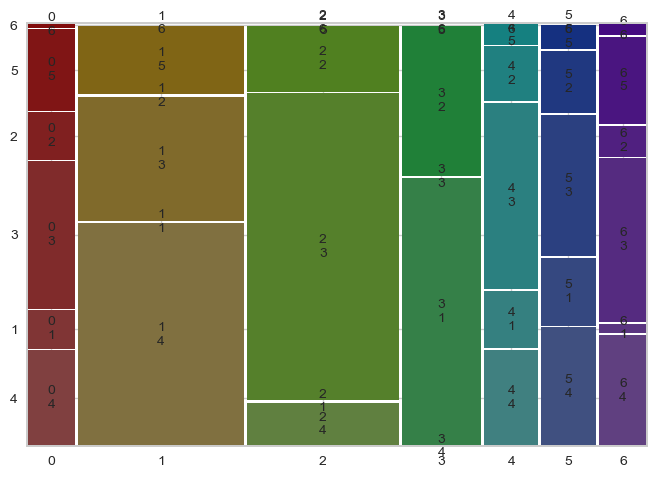

In [92]:
# [같이 하기] 'Age' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.
# crosstab의 margins='True'을 활용하면 행 합, 열 합을 추가할 수 있다.
# pro_df 변수에 할당해서 확인해보자.

feature_age = 'AGE'

pro_df1 = pd.crosstab([result[feature_age]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_df2 = pd.crosstab([result[feature_age]], result['cluster'], margins=True, normalize='columns')
pro_df2 = pro_df2.round(3)

# 합치기, concat
pro_df = pd.concat([pro_df1, pro_df2], axis=1)

# pro_df 확인
display(pro_df)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_age ])
plt.show()

<b>**'age' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
# cluster 0 : 30~50대가 넓게 분포한 혼합형 군집
# cluster 1 : 40대가 절반 이상으로 가장 뚜렷하게 높은 비중을 차지.
# cluster 2 : 30대 비율이 압도적으로 높아 사실상 30대 중심 군집.
# cluster 3 : 10~20대가 대부분을 차지하는 젊은층·초기 유입군.
# cluster 4 : 30대와 40대가 균형 있게 분포한 중장년 혼합형.
# cluster 5 : 30대와 40대 비중이 중심이지만 50대도 일부 포함되는 다층 연령군. 전환 또는 확장 고객층으로 볼 여지가 있음.
# cluster 6 : 특정 연령대 쏠림이 적은 혼합군. 뚜렷한 연령 특성이 없는 일반형 군집

### **2) 등록(계/피)**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
등록(계/피),,,,,,,,,,,,,,,,
계약자,747,2572,2388,1225,852,875,766,9425,0.785,0.778,0.791,0.771,0.79,0.81,0.786,0.785
피보험자,204,735,631,364,227,205,209,2575,0.215,0.222,0.209,0.229,0.21,0.19,0.214,0.215
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\

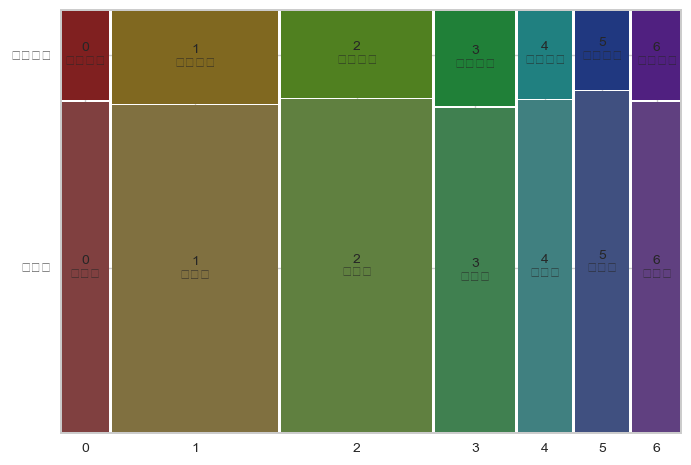

In [93]:
# [문제 13] '등록(계/피)' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature_registration = '등록(계/피)'

pro_regis1 = pd.crosstab([result[feature_registration]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_regis2 = pd.crosstab([result[feature_registration]], result['cluster'], margins=True, normalize='columns')
pro_regis2 = pro_regis2.round(3)

# 합치기, concat
pro_regis = pd.concat([pro_regis1, pro_regis2], axis=1)

# pro_df 확인
display(pro_regis)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_registration])
plt.show()

<b>**'등록(계/피)' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제 14] 바로 ppt 작성

### **3) 성별**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
성별,,,,,,,,,,,,,,,,
0,486,1712,1509,816,596,553,477,6149,0.511,0.518,0.5,0.514,0.552,0.512,0.489,0.512
1,465,1595,1510,773,483,527,498,5851,0.489,0.482,0.5,0.486,0.448,0.488,0.511,0.488
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


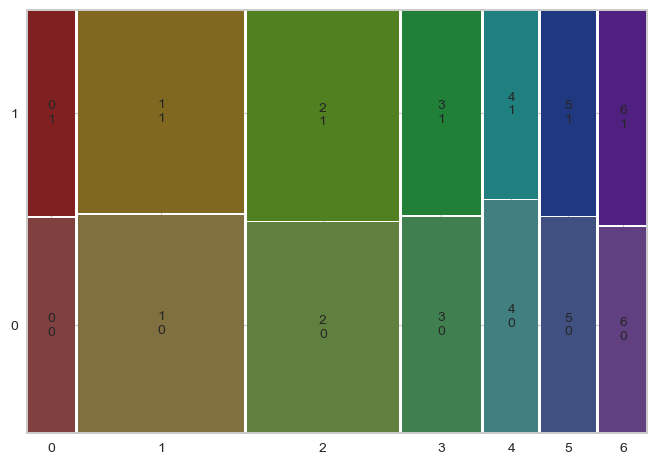

In [94]:
# [문제 15] '성별' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature_gender = '성별'

pro_gen1 = pd.crosstab([result[feature_gender]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_gen2 = pd.crosstab([result[feature_gender]], result['cluster'], margins=True, normalize='columns')
pro_gen2 = pro_gen2.round(3)

# 합치기, concat
pro_gen = pd.concat([pro_gen1, pro_gen2], axis=1)

# pro_df 확인
display(pro_gen)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_gender])
plt.show()

<b>**'성별' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제16] 바로 ppt 작성

### **4) willingness to pay/stay(수치)**

C:\Users\User\AppData\Local\Temp\ipykernel_5544\276036933.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(result[['cluster',feature_WTP]].groupby(['cluster']).agg(['max','min','mean','median']))


Willingness to pay/Stay                                
                            max       min       mean     median
cluster                                                        
0                       65.2125  3.518700  11.628994   9.421125
1                       52.3476  2.508600   8.080541   6.160500
2                       49.6947  2.045730   7.684331   5.672100
3                       54.8562  2.465643   8.100172   6.193800
4                       51.7371  2.088798   7.529804   5.794200
5                       49.7946  2.444109   8.223399   6.010650
6                       92.4963  3.407700  15.852422  11.244300

C:\Users\User\AppData\Local\Temp\ipykernel_5544\276036933.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=feature_WTP, data=result, palette='cool')  #barplot 은 평균을 기본값으로 표시. 다른걸 기준으로 바꿀 수도 있음


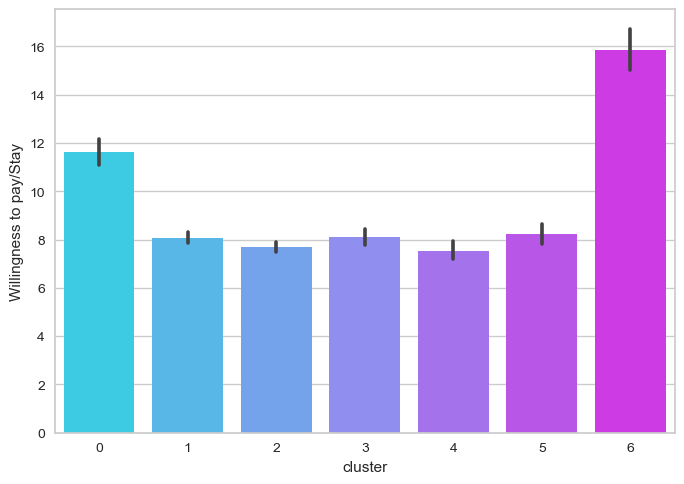

In [95]:
# [같이 하기] WTP의 경우 '보험 유지 기대 확률'로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

feature_WTP = 'Willingness to pay/Stay'
display(result[['cluster',feature_WTP]].groupby(['cluster']).agg(['max','min','mean','median']))

# 시각화를 해 봅시다.
sns.barplot(x='cluster', y=feature_WTP, data=result, palette='cool')  #barplot 은 평균을 기본값으로 표시. 다른걸 기준으로 바꿀 수도 있음
plt.show()


<b>**'WTP' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#Cluster 0, 6 → 핵심 유지 대상, 장기 계약 전략 강화 (VIP 관리 필요)
#Cluster 4, 2 → 유지 확률 낮음 → 이탈 방지 캠페인 필요
#Cluster 1, 3, 5 → 안정형으로 지속 유지 관리 및 장기 전환 유도, 추가상품 제안에 적합

### **5) 상품 타입**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
상품타입,,,,,,,,,,,,,,,,
고급,951,0,0,0,1,0,123,1075,1.0,0.000,0.000,0.000,0.001,0.000,0.126,0.090
기본,0,2212,2004,1123,699,709,531,7278,0.0,0.669,0.664,0.707,0.648,0.656,0.545,0.606
중급,0,1095,1015,466,379,371,321,3647,0.0,0.331,0.336,0.293,0.351,0.344,0.329,0.304
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


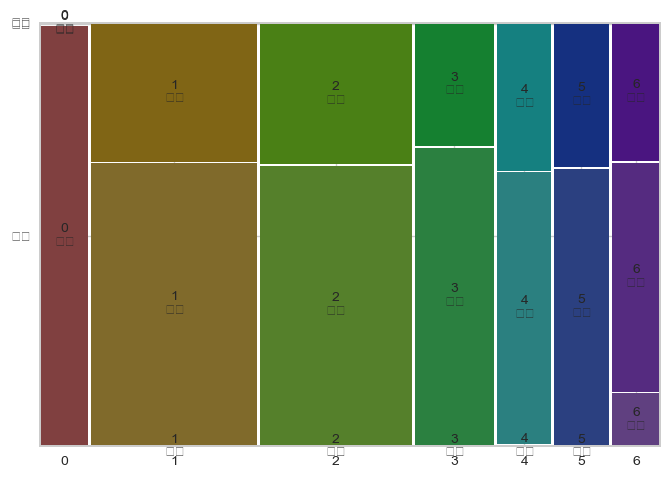

In [96]:
# [문제 17] '상품타입' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature_type = '상품타입'

pro_type1 = pd.crosstab([result[feature_type]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_type2 = pd.crosstab([result[feature_type]], result['cluster'], margins=True, normalize='columns')
pro_type2 = pro_type2.round(3)

# 합치기, concat
pro_type = pd.concat([pro_type1, pro_type2], axis=1)

# pro_df 확인
display(pro_type)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_type])
plt.show()

<b>**'상품타입' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#Cluster 0	완전 프리미엄 고객 (이미 고급 상품 선택, 높은 구매력·충성도)
#Cluster 6	프리미엄 잠재군 (현재는 기본/중급 중심이지만 고급 선택 비율 높음)
#Cluster 1,2,4,5	기본형 실리 선택층 (가격/실속 중심)
#Cluster 3	젊고 의존형이라 실용성/저비용 선호 가장 강함

### **6) 교육수준**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
교육수준,,,,,,,,,,,,,,,,
고졸이하,301,962,1031,516,333,0,334,3477,0.317,0.291,0.342,0.325,0.309,0.000,0.343,0.290
대학졸업,553,2345,1988,1073,602,0,544,7105,0.581,0.709,0.658,0.675,0.558,0.000,0.558,0.592
박사,20,0,0,0,40,353,26,439,0.021,0.000,0.000,0.000,0.037,0.327,0.027,0.037
석사,77,0,0,0,104,727,71,979,0.081,0.000,0.000,0.000,0.096,0.673,0.073,0.082
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51320 (\N{HANGUL SYLLABLE JOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\s

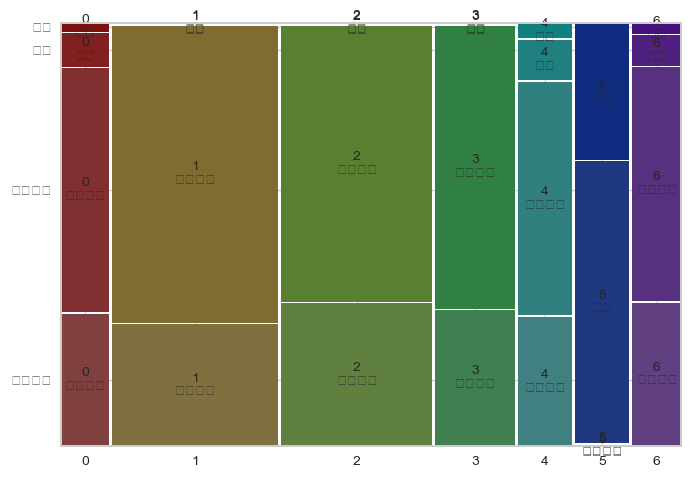

In [97]:
# [문제 19] '교육수준' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature_edu = '교육수준'

pro_edu1 = pd.crosstab([result[feature_edu]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_edu2 = pd.crosstab([result[feature_edu]], result['cluster'], margins=True, normalize='columns')
pro_edu2 = pro_edu2.round(3)

# 합치기, concat
pro_edu = pd.concat([pro_edu1, pro_edu2], axis=1)

# pro_df 확인
display(pro_edu)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_edu])
plt.show()

<b>**'교육수준' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
'''
Cluster 0
대학졸업(58.1%) 비중이 높고, 석·박사 소폭 존재
중상위 교육수준의 안정형 직장인 고객층
고졸이하도 31%로 있어 상대적으로 교육 다양성이 큰 군집

Cluster 1
대학졸업 70.9%로 모든 군집 중 가장 높은 대학졸업 비중
고졸이하는 29.1%, 고학력(석박) 0%
대졸 기반 실무형 직장인 대다수 (전문직/고학력 비율은 낮음)
실리형/평균형 고객, 대다수 일반 고객 시장

Cluster 2
대학졸업 65.8% / 고졸이하 34.2%

Cluster 3
대학졸업 67.5% / 고졸이하 32.5%
연령이 젊고(10~20대 ↑) 교육수준은 아직 미완성 가능성
미래 상향 가능성이 있는 성장 고객군(향후 대학졸업/소득 향상 가능)

Cluster 4
석·박사 비중 (석사 9.6% + 박사 3.7% = 13.3%)
전문직 혹은 고학력 비율 높음
대학졸업 55.8%도 적지 않음

Cluster 5
석사 67.3%, 박사 32.7% (거의 100% 고학력)
교육 수준만 보면 최상위 엘리트·전문직 군집

Cluster 6
대학졸업 55.8%, 석사 7.3%, 박사 2.7%
Cluster 4와 유사하나 석·박사 비중은 더 낮음
'''

### **7) 고용상태**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
고용상태,,,,,,,,,,,,,,,,
FALSE,6,0,255,0,39,27,33,360,0.006,0.0,0.084,0.0,0.036,0.025,0.034,0.030
고용,611,3307,0,1589,632,800,579,7518,0.642,1.0,0.000,1.0,0.586,0.741,0.594,0.626
무직,233,0,2089,0,285,139,282,3028,0.245,0.0,0.692,0.0,0.264,0.129,0.289,0.252
휴직,101,0,675,0,123,114,81,1094,0.106,0.0,0.224,0.0,0.114,0.106,0.083,0.091
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 55092 (\N{HANGUL SYLLABLE HYU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


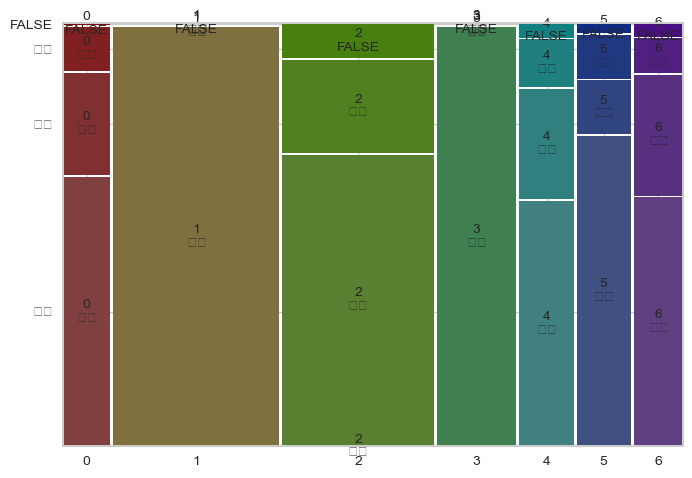

In [98]:
# [문제 21] '고용상태' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature_status = '고용상태'

pro_status1 = pd.crosstab([result[feature_status]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_status2 = pd.crosstab([result[feature_status]], result['cluster'], margins=True, normalize='columns')
pro_status2 = pro_status2.round(3)

# 합치기, concat
pro_status = pd.concat([pro_status1, pro_status2], axis=1)

# pro_df 확인
display(pro_status)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_status])
plt.show()

<b>**'고용상태' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#Cluster 1,3	100% 직장·정규 고용
#Cluster 5	고학력 + 74% 고용 + 휴직 10% → 전문직/연구직 가능성
#Cluster 0,4	고용은 있으나 혼재형 → 전환기·가구형 고객
#Cluster 6	고용 비율은 중간이지만 근로소득 외 자산형 고객(잠재 VIP)
#Cluster 2	무직/휴직이 절대 다수 → 경제활동 비참여·경력단절·전환기군

### **8) 소득(수치)**

C:\Users\User\AppData\Local\Temp\ipykernel_5544\3203384298.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(result[['cluster',feature_income]].groupby(['cluster']).agg(['max','min','mean','median']))


소득                                     
               max       min          mean       median
cluster                                                
0        128243500         0  4.810864e+07   45389300.0
1         96421000  24045000  5.376555e+07   52493000.0
2         39601100         0  7.754090e+06          0.0
3        132020900  82386000  1.019033e+08  100976700.0
4        131727200         0  4.512578e+07   38944400.0
5        131674400         0  5.549815e+07   52768500.0
6        130366500         0  4.050439e+07   35901000.0

C:\Users\User\AppData\Local\Temp\ipykernel_5544\3203384298.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=feature_income, data=result, palette='cool')  #barplot 은 평균을 기본값으로 표시. 다른걸 기준으로 바꿀 수도 있음
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


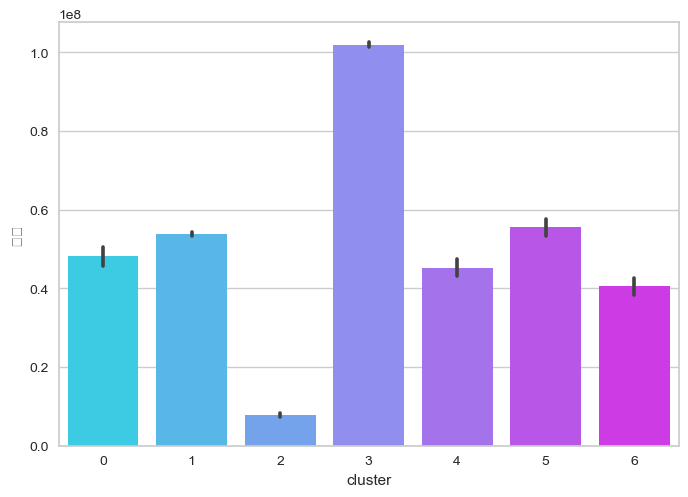

In [99]:
# [문제 23] '소득'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

feature_income = '소득'
display(result[['cluster',feature_income]].groupby(['cluster']).agg(['max','min','mean','median']))

# 시각화를 해 봅시다.
sns.barplot(x='cluster', y=feature_income, data=result, palette='cool')  #barplot 은 평균을 기본값으로 표시. 다른걸 기준으로 바꿀 수도 있음
plt.show()

<b>**'소득' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#3	고소득 전문직/상위 직장인 → 업셀링 1순위
#1, 5	안정 직장 대규모층 & 고학력 전문직
#0, 4	중장년/가구형 안정층 (유지형)
#6	자산형·근로소득 낮아도 유지강한 VIP 잠재군
#2	경제활동 단절층 → 이탈/관리 필요

### **9) 결혼여부**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
결혼여부,,,,,,,,,,,,,,,,
기혼,570,2232,1187,1073,676,702,517,6957,0.599,0.675,0.393,0.675,0.627,0.65,0.53,0.58
미혼,381,1075,1832,516,403,378,458,5043,0.401,0.325,0.607,0.325,0.373,0.35,0.47,0.42
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


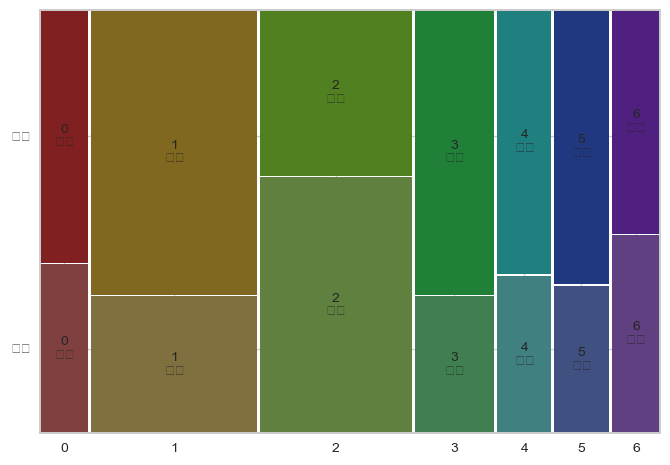

In [100]:
# [문제 25] '결혼여부' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature_mar = '결혼여부'

pro_mar1 = pd.crosstab([result[feature_mar]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_mar2 = pd.crosstab([result[feature_mar]], result['cluster'], margins=True, normalize='columns')
pro_mar2 = pro_mar2.round(3)

# 합치기, concat
pro_mar = pd.concat([pro_mar1, pro_mar2], axis=1)

# pro_df 확인
display(pro_mar)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_mar])
plt.show()

<b>**'결혼여부' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제26]
#1, 3, 5	가족 기반 실리형 안정 고객 (기혼 비율 과반)
#0, 4	중장년 가구 책임형 (프리미엄/가계 유지 결합)
#2	미혼 중심 → 경제적/사회적 이행 전 단계 (이탈 가능↑)
#6	기혼·미혼 균형 → 생계 대신 자기결정 기반 유지 (자산형 특징 재확인)

### **10) 월 납입액(수치)**

C:\Users\User\AppData\Local\Temp\ipykernel_5544\369265420.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(result[['cluster',feature_pay]].groupby(['cluster']).agg(['max','min','mean','median']))


월 납입액                        
          max  min        mean median
cluster                              
0         230  110  135.299685  120.0
1         160   60   87.704868   80.0
2         160   60   88.684995   80.0
3         160   60   87.589679   80.0
4         160   60   88.276182   80.0
5         160   60   88.500000   80.0
6         350  100  189.056410  190.0

C:\Users\User\AppData\Local\Temp\ipykernel_5544\369265420.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=feature_pay, data=result, palette='cool')  #barplot 은 평균을 기본값으로 표시. 다른걸 기준으로 바꿀 수도 있음
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45225 (\N{HANGUL SYLLABLE NAB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\cor

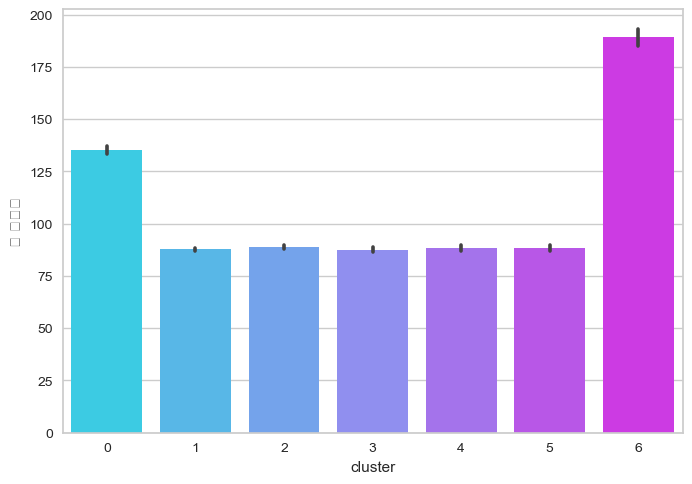

In [101]:
# [문제 27] '월 납입액'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

feature_pay = '월 납입액'
display(result[['cluster',feature_pay]].groupby(['cluster']).agg(['max','min','mean','median']))

# 시각화를 해 봅시다.
sns.barplot(x='cluster', y=feature_pay, data=result, palette='cool')  #barplot 은 평균을 기본값으로 표시. 다른걸 기준으로 바꿀 수도 있음
plt.show()

<b>**'월 납입액' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제28]
#6, 0	가치·품질 기반, 가격 민감도 낮음, 프리미엄 실납입 고객층
#3	가치 판단형 고소득층, 소득 높지만 납입액은 표준 → 업셀링 가능
#1,4,5	실속형 주류 고객층, 중산층 실리형 유지
#2	소득제약형, 비용 한계군, 위험/이탈 가능층(최저지출)

### **11) VOC**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
VOC,,,,,,,,,,,,,,,,
0,764,2614,2399,1266,847,850,775,9515,0.803,0.790,0.795,0.797,0.785,0.787,0.795,0.793
1,99,380,329,156,107,131,111,1313,0.104,0.115,0.109,0.098,0.099,0.121,0.114,0.109
2,49,124,124,65,51,34,48,495,0.052,0.037,0.041,0.041,0.047,0.031,0.049,0.041
3,24,105,101,69,41,35,30,405,0.025,0.032,0.033,0.043,0.038,0.032,0.031,0.034
4,9,62,44,19,27,27,8,196,0.009,0.019,0.015,0.012,0.025,0.025,0.008,0.016
5,6,22,22,14,6,3,3,76,0.006,0.007,0.007,0.009,0.006,0.003,0.003,0.006
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


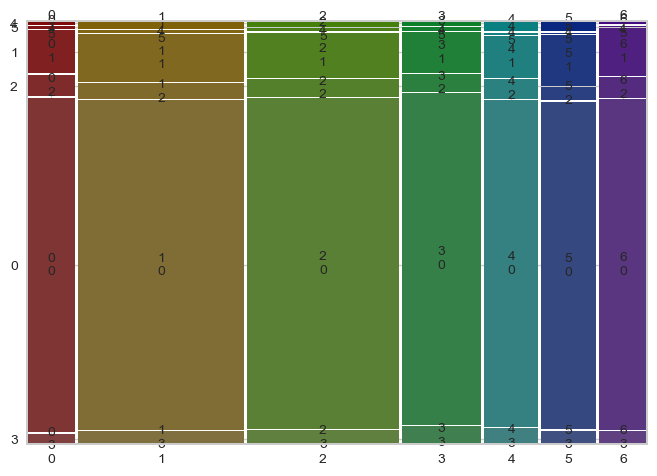

In [102]:
# [문제 29] 'VOC' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature_VOC = 'VOC'

pro_VOC1 = pd.crosstab([result[feature_VOC]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_VOC2 = pd.crosstab([result[feature_VOC]], result['cluster'], margins=True, normalize='columns')
pro_VOC2 = pro_VOC2.round(3)

# 합치기, concat
pro_VOC = pd.concat([pro_VOC1, pro_VOC2], axis=1)

# pro_df 확인
display(pro_VOC)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_VOC])
plt.show()

<b>**'VOC' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제30]
#군집 간 VOC 발생 비율 차이는 크지 않음
#6,5는 CS 품질 민감도 높음 (VIP/전문직)
#2,3군은 불만이 있어도 VOC 제기보다 “조용한 이탈” 우려
#책임감 관점	0,1,4군은 안정형

### **12) 타 상품 보유 현황**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
타 상품 보유 현황,,,,,,,,,,,,,,,,
1,329,1163,1026,568,439,403,355,4283,0.346,0.352,0.340,0.357,0.407,0.373,0.364,0.357
2,267,850,783,359,251,262,245,3017,0.281,0.257,0.259,0.226,0.233,0.243,0.251,0.251
3,120,421,391,229,132,147,105,1545,0.126,0.127,0.130,0.144,0.122,0.136,0.108,0.129
4이상,235,873,819,433,257,268,270,3155,0.247,0.264,0.271,0.272,0.238,0.248,0.277,0.263
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


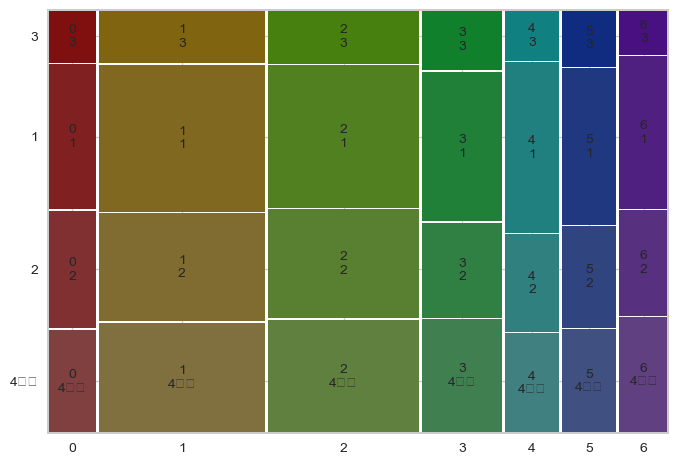

In [103]:
# [문제 31] '타 상품 보유 현황' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature_goods = '타 상품 보유 현황'

pro_goods1 = pd.crosstab([result[feature_goods]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_goods2 = pd.crosstab([result[feature_goods]], result['cluster'], margins=True, normalize='columns')
pro_goods2 = pro_goods2.round(3)

# 합치기, concat
pro_goods = pd.concat([pro_goods1, pro_goods2], axis=1)

# pro_df 확인
display(pro_goods)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_goods])
plt.show()

<b>**'타 상품 보유 현황	' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제32]
#멀티보유율 최고 (6)	충성도의 ‘깊이’가 이미 형성됨 (강력한 VIP)
#멀티보유율 높은 편 (0,1,2,3,5)	소득/특성은 달라도 ‘관계 기반’은 꽤 견고
#멀티보유 중위군 (4)	실속형, 유지는 하지만 확장성은 중간
#특이 포인트 (Cluster 2)	소득은 최저인데 멀티보유는 ↑ → 과거/가족 단위 가입, 현재 유지 역량 저하

### **13) 갱신 인센티브**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
갱신인센티브,,,,,,,,,,,,,,,,
설계사독려,255,1141,718,701,382,381,287,3865,0.268,0.345,0.238,0.441,0.354,0.353,0.294,0.322
없음,64,441,240,228,118,149,98,1338,0.067,0.133,0.079,0.143,0.109,0.138,0.101,0.112
포인트,145,572,433,233,159,197,152,1891,0.152,0.173,0.143,0.147,0.147,0.182,0.156,0.158
할인,487,1153,1628,427,420,353,438,4906,0.512,0.349,0.539,0.269,0.389,0.327,0.449,0.409
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54624 (\N{HANGUL SYLLABLE HAL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Li

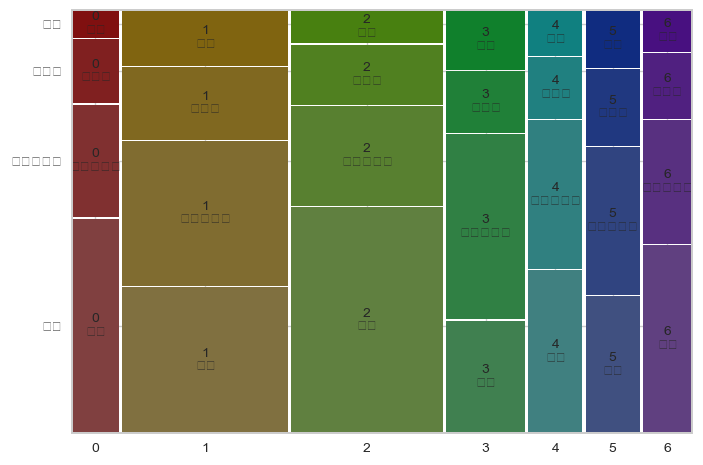

In [104]:
# [문제 33] '갱신인센티브' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature_incen = '갱신인센티브'

pro_incen1 = pd.crosstab([result[feature_incen]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_incen2 = pd.crosstab([result[feature_incen]], result['cluster'], margins=True, normalize='columns')
pro_incen2 = pro_incen2.round(3)

# 합치기, concat
pro_incen = pd.concat([pro_incen1, pro_incen2], axis=1)

# pro_df 확인
display(pro_incen)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_incen])
plt.show()

<b>**'갱신인센티브	' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제 34]
#0	할인 중심	장기 프리미엄 고객, 혜택형 유지
#1	설계사 주도 + 할인 균형	대규모 대중적 상담 유지형
#2	할인 절대의존	가격 끊기면 바로 이탈 가능성
#3	설계사 독려 의존 최상위	초·중기 가입 고객 락인(관계형 유지)
#4	할인 + 설계사 혼합 유지	가족형 실속 고객
#5	설계사/정보 기반 유지	“지식형 고객 → 설득력을 신뢰자산으로 유지”
#6	할인은 부가혜택, 핵심은 충성도/자산 기반	VIP 유지형

### **14) 총 지불 금액(수치)**

C:\Users\User\AppData\Local\Temp\ipykernel_5544\675892624.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(result[['cluster',feature_total_pay]].groupby(['cluster']).agg(['max','min','mean','median']))


총지불금액                              
             max   min          mean    median
cluster                                       
0        2663000  1000  7.176435e+05  674000.0
1        1512000  1000  4.219229e+05  409000.0
2        1919000  3000  6.220374e+05  578000.0
3        1040000     0  3.432498e+05  351000.0
4        1700000  1000  4.482734e+05  427000.0
5        1340000  2000  3.806731e+05  385000.0
6        3573000  2000  1.057516e+06  957000.0

C:\Users\User\AppData\Local\Temp\ipykernel_5544\675892624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=feature_total_pay, data=result, palette='cool')  #barplot 은 평균을 기본값으로 표시. 다른걸 기준으로 바꿀 수도 있음
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPyth

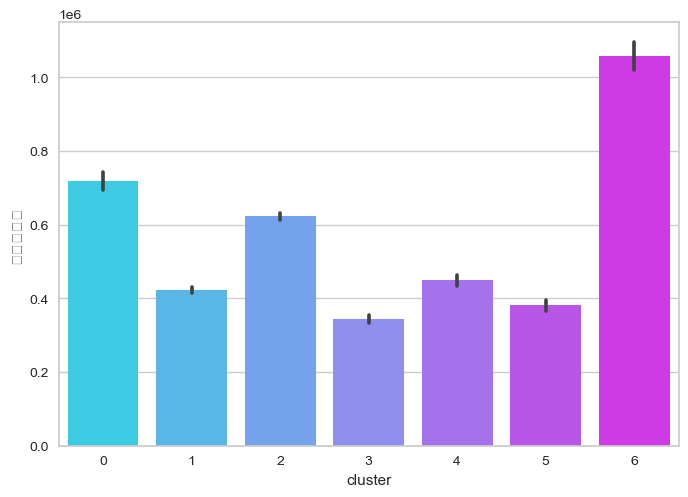

In [105]:
# [문제 35] '총지불금액'은 수치형으로 각 clust 별 min,max,mean,median 통계 값으로 확인해보자.
# groupby 와 agg() 메소드를 활용하여 도출해 보자.

feature_total_pay = '총지불금액'
display(result[['cluster',feature_total_pay]].groupby(['cluster']).agg(['max','min','mean','median']))

# 시각화를 해 봅시다.
sns.barplot(x='cluster', y=feature_total_pay, data=result, palette='cool')  #barplot 은 평균을 기본값으로 표시. 다른걸 기준으로 바꿀 수도 있음
plt.show()

<b>**'총지불금액' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제 36]
'''
Cluster 6
평균 약 1,057,000원 (전체 중 1위 / 압도적)
보험금 청구규모가 매우 큼

Cluster 0
평균 약 717,000원 (2위)
프리미엄 상품 유지형 특성과 결합
→ 실제 보장 가치 활용도가 높은 군
→ 경험적으로 보험 가치를 체감한 고객군

Cluster 2
평균 약 622,000원 (3위)
소득 최저인데 총 지급액은 높음
→ 보험금 수혜 → 재무안정 보조 역할
→ 갱신 시 가격 민감도 높음 → 할인 중심 유지 →
보험이 보호막 역할을 하는 군집

Cluster 4
평균 448,000원
가족형/실속형 군집답게 사용량도 중간
→ 필요할 때만 활용하는 중립형

Cluster 1
평균 421,000원
대규모 직장인 층이므로 건강·위험률은 평균
→ Low-Risk 실속 고객

Cluster 5
평균 380,000원
고학력·전문직 → 위험/질병 exposure 상대적으로 낮음
→ Low-Claim High-Skill 고객

Cluster 3
평균 343,000원 (최저)
젊고 건강한 계층
→ 보험은 “사용보단 대비 목적”
→ 장기적인 LTV 성장 가능
'''

### **15) 자동차**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
자동차,,,,,,,,,,,,,,,,
SUV,194,716,698,315,209,200,4,2336,0.204,0.217,0.231,0.198,0.194,0.185,0.004,0.195
고급차,0,0,0,0,0,0,454,454,0.000,0.000,0.000,0.000,0.000,0.000,0.466,0.038
스포츠카,6,5,5,46,34,39,517,652,0.006,0.002,0.002,0.029,0.032,0.036,0.530,0.054
일반세단,556,1879,1653,833,564,589,0,6074,0.585,0.568,0.548,0.524,0.523,0.545,0.000,0.506
컴팩트카,195,707,663,395,272,252,0,2484,0.205,0.214,0.220,0.249,0.252,0.233,0.000,0.207
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52980 (\N{HANGUL SYLLABLE KEOM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54057 (\N{HANGUL SYLLABLE PAEG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\L

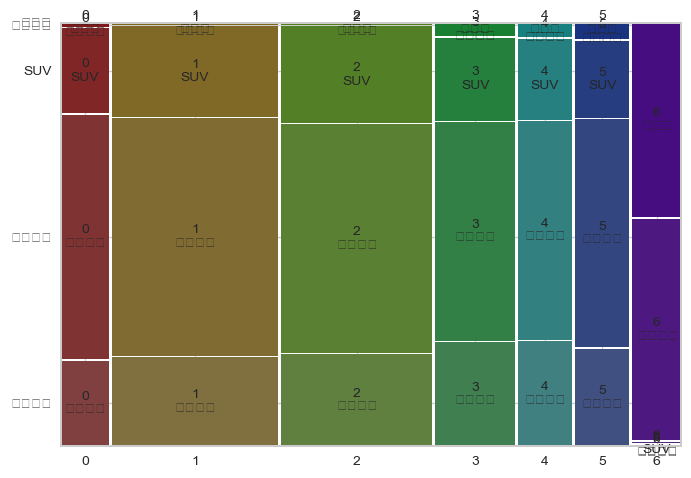

In [106]:
# [문제 37] '자동차' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature_car = '자동차'

pro_car1 = pd.crosstab([result[feature_car]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_car2 = pd.crosstab([result[feature_car]], result['cluster'], margins=True, normalize='columns')
pro_car2 = pro_car2.round(3)

# 합치기, concat
pro_car = pd.concat([pro_car1, pro_car2], axis=1)

# pro_df 확인
display(pro_car)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_car])
plt.show()

<b>**'자동차' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제38]
#Cluster 6	고급차·스포츠카 99%	프리미엄/자산가 군
#Cluster 3/5	스포츠카 소폭 ↑	젊은형/전문직 감성형 소비
#Cluster 0/1/4	SUV+일반세단 혼합	가정 중심 실속형
#Cluster 2	컴팩트카↑ + SUV↓	경제취약형 / 생활비 우선

 ### **16) 거주지 사이즈**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
거주지사이즈,,,,,,,,,,,,,,,,
대,85,0,0,0,1079,0,81,1245,0.089,0.000,0.000,0.000,1.0,0.000,0.083,0.104
소,185,699,675,343,0,249,181,2332,0.195,0.211,0.224,0.216,0.0,0.231,0.186,0.194
중,681,2608,2344,1246,0,831,713,8423,0.716,0.789,0.776,0.784,0.0,0.769,0.731,0.702
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


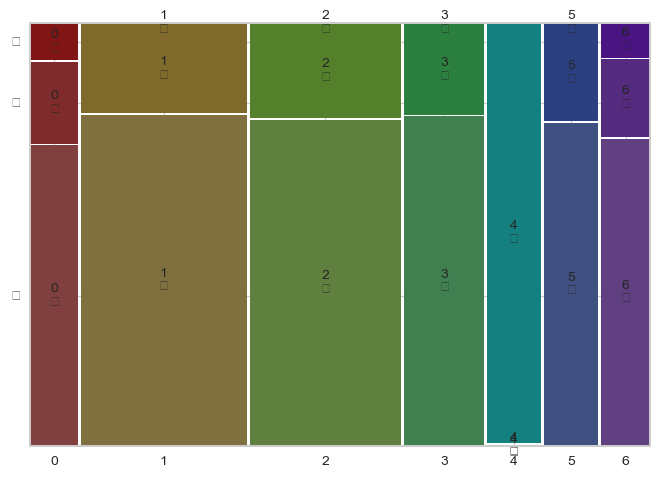

In [107]:
# [문제 39] '거주지사이즈' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature_house = '거주지사이즈'

pro_house1 = pd.crosstab([result[feature_house]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_house2 = pd.crosstab([result[feature_house]], result['cluster'], margins=True, normalize='columns')
pro_house2 = pro_house2.round(3)

# 합치기, concat
pro_house = pd.concat([pro_house1, pro_house2], axis=1)

# pro_df 확인
display(pro_house)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_house])
plt.show()

<b>**'거주지사이즈' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제40] 바로 ppt 작성

### **17) 갱신**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
갱신,,,,,,,,,,,,,,,,
0,825,2908,2540,1386,868,922,835,10284,0.868,0.879,0.841,0.872,0.804,0.854,0.856,0.857
1,126,399,479,203,211,158,140,1716,0.132,0.121,0.159,0.128,0.196,0.146,0.144,0.143
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


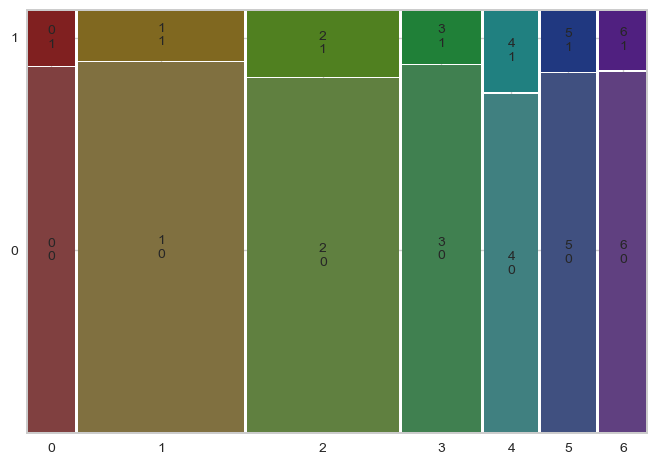

In [108]:
# [문제 41] '갱신' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature_renewal = '갱신'

pro_renewal1 = pd.crosstab([result[feature_renewal]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_renewal2 = pd.crosstab([result[feature_renewal]], result['cluster'], margins=True, normalize='columns')
pro_renewal2 = pro_renewal2.round(3)

# 합치기, concat
pro_renewal = pd.concat([pro_renewal1, pro_renewal2], axis=1)

# pro_df 확인
display(pro_renewal)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_renewal])
plt.show()

<b>**'갱신' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제42]
'''
갱신 비율이 높은 군집
Cluster 4 (19.6%)
Cluster 2 (15.9%)
Cluster 5 (14.6%) / 6 (14.4%)
이 군집들은 “보험을 다시 한 번 선택(갱신)”한 경험이 상대적으로 많은 고객
갱신 비율이 낮은 군집
Cluster 1 (12.1%)
Cluster 3 (12.8%)
Cluster 0 (13.2%)
이 고객들은 “갱신 없이 계속 유지” 또는 “구독처럼 자동 지속 중”인 유형이 많음
'''

### **18) 지역**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
지역,,,,,,,,,,,,,,,,
도시근교,658,1772,2754,539,648,469,732,7572,0.692,0.536,0.912,0.339,0.601,0.434,0.751,0.631
도심,111,770,130,505,175,268,125,2084,0.117,0.233,0.043,0.318,0.162,0.248,0.128,0.174
시골,182,765,135,545,256,343,118,2344,0.191,0.231,0.045,0.343,0.237,0.318,0.121,0.195
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49900 (\N{HANGUL SYLLABLE SIM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Li

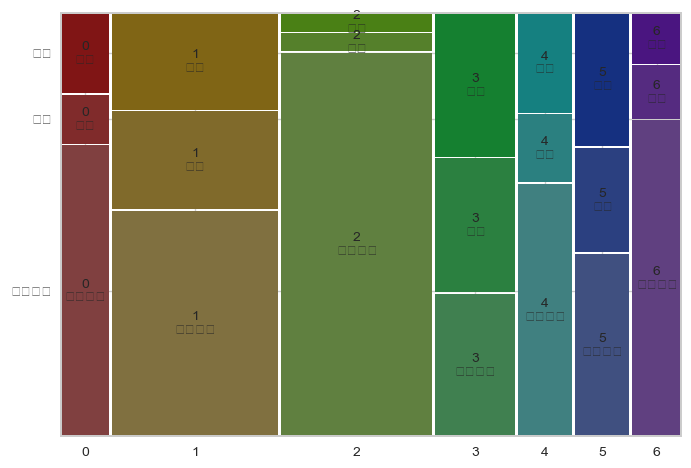

In [109]:
# [문제 43] '지역' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature_area = '지역'

pro_area1 = pd.crosstab([result[feature_area]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_area2 = pd.crosstab([result[feature_area]], result['cluster'], margins=True, normalize='columns')
pro_area2 = pro_area2.round(3)

# 합치기, concat
pro_area = pd.concat([pro_area1, pro_area2], axis=1)

# pro_df 확인
display(pro_area)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_area])
plt.show()

<b>**'지역' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제44]
'''
Cluster	도심 도시근교 시골	특징요약
0	11.7%	69.2%	19.1%	안정형 가구가 많은 전형적 근교 정착층
1	23.3%	53.6%	23.1%	분포 다양 / 실속형 직장인 표준 분포
2	4.3%	91.2%	4.5%	압도적 도시근교 → 비용 민감/생활권 외곽형
3	31.8%	33.9%	34.3%	3개 지역이 거의 균등 → 이동성/이주 가능층
4	16.2%	60.1%	23.7%	부동산자산형 + 외곽 거주(토지형 자산 가능성)
5	24.8%	43.4%	31.8%	시골 비중↑ → 원격근무/전문직/라이프형
6	12.8%	75.1%	12.1%	프리미엄형 mobility 고객(도심→근교 소비)
'''

### **19) 온라인방문빈도**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
온라인방문빈도,,,,,,,,,,,,,,,,
비방문,713,2438,2266,1149,809,832,721,8928,0.750,0.737,0.751,0.723,0.75,0.77,0.739,0.744
자주방문,204,735,631,364,227,205,209,2575,0.215,0.222,0.209,0.229,0.21,0.19,0.214,0.215
종종,34,134,122,76,43,43,45,497,0.036,0.041,0.040,0.048,0.04,0.04,0.046,0.041
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib

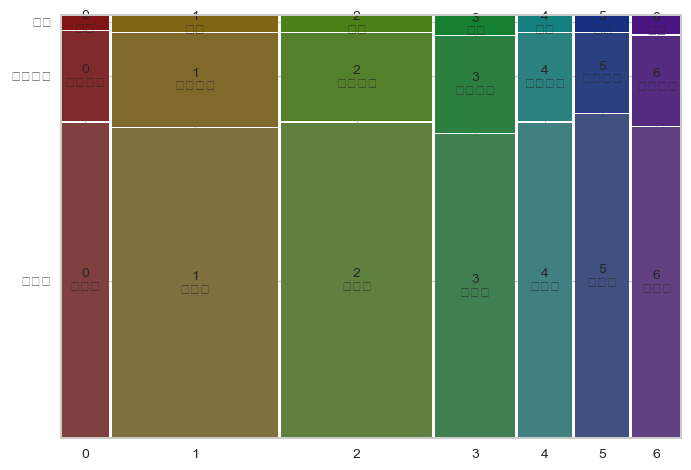

In [110]:
# [문제 45] '온라인방문빈도' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature_online = '온라인방문빈도'

pro_online1 = pd.crosstab([result[feature_online]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_online2 = pd.crosstab([result[feature_online]], result['cluster'], margins=True, normalize='columns')
pro_online2 = pro_online2.round(3)

# 합치기, concat
pro_online = pd.concat([pro_online1, pro_online2], axis=1)

# pro_df 확인
display(pro_online)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_online])
plt.show()

<b>**'온라인방문빈도' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제46]
'''
방문이 많은 군집 (자주/종종 비중이 상대적으로 높은 군집)
Cluster 3 (22.9% 자주 + 4.8% 종종 → 최고)
→ 젊고 디지털 친화적, 온라인 기반 self-checking 경향
→ 설계사 의존 ↓, 정보 접근성 ↑
Cluster 1 / 6
→ 평균보다 약간 높음
→ 디지털/오프라인 균형형

방문이 적은 군집 (디지털 접점 낮음)
Cluster 5 (비방문 77.0%)
→ 고학력/전문직이지만 디지털 이용이 꼭 높지는 않음
→ “관여도보단 신뢰” 중심
Cluster 0 / 2 / 4
→ 실속형·가구형·취약형 포지션으로
→ 플랫폼보단 대면/전화/자동연장 기반 유지
'''

### **20) 판매채널**

cluster,0,1,2,3,4,5,6,All,0,1,2,3,4,5,6,All
판매채널,,,,,,,,,,,,,,,,
대리점,341,1272,1216,593,385,400,385,4592,0.359,0.385,0.403,0.373,0.357,0.370,0.395,0.383
인터넷,149,466,438,238,141,145,163,1740,0.157,0.141,0.145,0.150,0.131,0.134,0.167,0.145
자사영업,271,938,803,420,334,321,262,3349,0.285,0.284,0.266,0.264,0.310,0.297,0.269,0.279
콜센터,190,631,562,338,219,214,165,2319,0.200,0.191,0.186,0.213,0.203,0.198,0.169,0.193
All,951,3307,3019,1589,1079,1080,975,12000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib

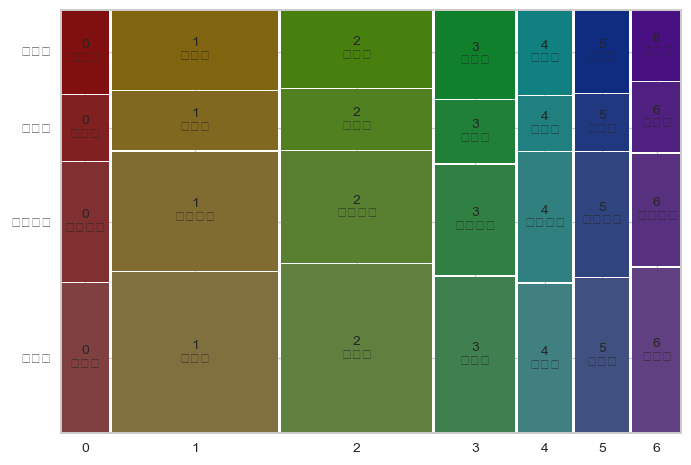

In [111]:
# [문제 47] '판매채널' 열에 대해 crosstab을 활용해서 clust별 범주별 합계를 확인 해보자.

feature_channel = '판매채널'

pro_channel1 = pd.crosstab([result[feature_channel]], result['cluster'], margins=True)

# 비율로도 한번 확인 해보자.

pro_channel2 = pd.crosstab([result[feature_channel]], result['cluster'], margins=True, normalize='columns')
pro_channel2 = pro_channel2.round(3)

# 합치기, concat
pro_channel = pd.concat([pro_channel1, pro_channel2], axis=1)

# pro_df 확인
display(pro_channel)

# 시각화를 해 봅시다.
mosaic(result.sort_values('cluster'), [ 'cluster', feature_channel])
plt.show()

<b>**'판매채널' 변수에 대한 클러스터별 특징을 파악해보고 아래 주석에 적어보자!**
( 바로 ppt에 작성을 해도 상관없다)

In [ ]:
#[문제48]
'''
0	대리점(35.9%), 자사영업(28.5%), 콜센터(20%)	대면 기반 신뢰 유지형 (전통적 가입경로)
1	대리점(38.5%) > 자사영업(28.4%)	가장 전형적인 오프라인(대면) 실속형 진입
2	대리점 40.3% (전체 최고)	경제취약 + 보호형 성격이 “설계사 의존형”으로 연결됨
3	대리점 37.3% / 콜센터 21.3%	젊고 디지털 친화지만 최초는 여전히 대면중심
4	자사영업 31.0% (두 번째로 높음)	대리점보다 “브랜드 신뢰 기반 가입” 경향
5	자사영업 29.7% / 인터넷 13.4%	전문직/교육수준 영향 → 정보판단형
6	대리점 39.5% + 인터넷 16.7% (전체 최대)	VIP군답게 “대면+직접탐색 병행” = 옴니채널형
'''

---------------------------------------------------------------------------------------------
## **(2) 결과 정리**

<font color="1E90FF"><b>★ 20가지 피쳐값에 대해 군집별로 분석해 보았고 인사이트도 도출해 보았다. 한번 ppt에 정리해보자!</font>

## **[Mission 3-분석모델 개발]**

* k-means 활용해 군집화 분석 모델 개발 완료
* 프로파일링 기법을 통해 각 피쳐의 군집별 특성에 대해 파악하고 정의 해봄
* 정의 한 것을 가지고 고객 군집별 마케팅 전략 수립

<font color="1E90FF"><b>→ 여러분들은 어떻게 군집에 대해 정의를 내리고 마케팅 방안을 수립하였나요?<br><b>서로의 군집에 대해서 이야기해 보고 발표해 봅시다.<b><br>
    

# <b>Mission 3 완료!
수고하셨습니다!